In [1]:
from google.colab import files
uploaded = files.upload()

Saving seoul_1994-2020.csv to seoul_1994-2020.csv


In [2]:
# 1. Data Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("seoul_1994-2020.csv")

# Convert 'datetime' to datetime format and set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Focus on relevant columns (can adjust based on prediction goal)
df = df[['temp', 'tempmax', 'tempmin', 'humidity', 'dew',
         'precip', 'windspeed', 'windgust', 'cloudcover']]

# Interpolate missing values
df = df.interpolate(method='time')

# Visual check
print("Data Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
df.describe()


Data Shape: (9875, 9)
Missing values:
 temp             0
tempmax          0
tempmin          0
humidity         0
dew              0
precip           0
windspeed        0
windgust      4053
cloudcover       0
dtype: int64


,temp,tempmax,tempmin,humidity,dew,precip,windspeed,windgust,cloudcover
count,9875.000000,9875.000000,9875.000000,9875.000000,9875.000000,9875.000000,9875.000000,5822.000000,9875.000000
mean,54.661458,63.544780,46.009853,65.942268,42.273154,0.172008,10.276061,27.901659,52.376385
std,18.884883,18.994431,19.759794,13.441860,21.057924,0.656644,3.512477,8.446282,29.036674
min,0.900000,8.000000,-8.500000,20.300000,-15.800000,0.000000,2.800000,6.900000,0.000000
25%,38.200000,46.700000,29.000000,56.500000,25.400000,0.000000,7.900000,21.900000,27.900000
50%,56.900000,66.600000,46.800000,66.300000,43.500000,0.000000,9.700000,30.000000,52.600000
75%,71.700000,80.300000,63.900000,75.800000,60.800000,0.027000,12.000000,33.300000,77.300000
max,91.800000,102.300000,84.400000,98.800000,78.300000,13.460000,54.300000,70.200000,100.000000


In [3]:
# First identify the correct column name - for example, let's say it's 'timestamp'
print(df.columns)

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'dew', 'precip', 'windspeed',
       'windgust', 'cloudcover'],
      dtype='object')


In [ ]:
# lets check dtype of all columns,
df.dtypes, df.index.dtype

(temp          float64
 tempmax       float64
 tempmin       float64
 humidity      float64
 dew           float64
 precip        float64
 windspeed     float64
 windgust      float64
 cloudcover    float64
 dtype: object,
 dtype('<M8[ns]'))

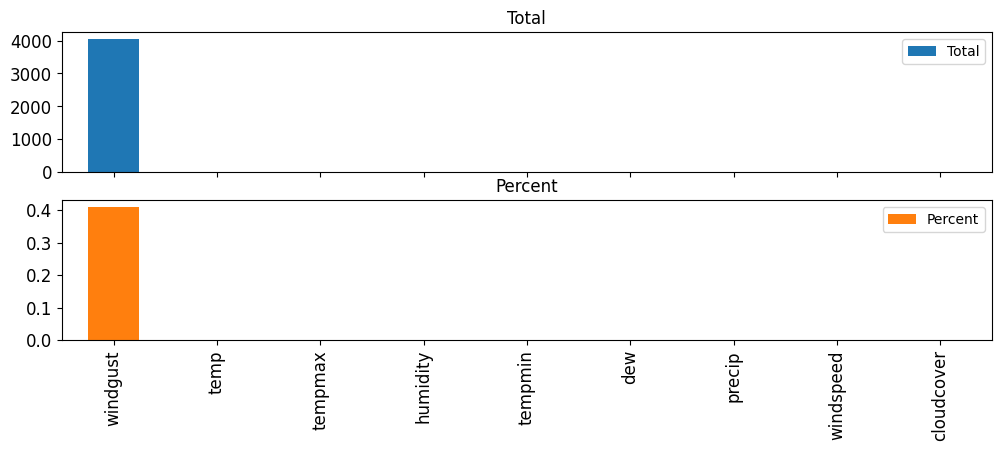

In [4]:
def list_and_visualize_missing_data(dataset):
    # Listing total null items and its percent with respect to all nulls
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total >= 0]
    #missing_data = missing_data[missing_data.Total > 0]

    #missing_data.plot.bar(subplots=True, figsize=(16,9))
    missing_data.plot.bar(subplots=True, figsize=(12,4), fontsize=12)

list_and_visualize_missing_data(df)

In [5]:
# Load the CSV file
data = pd.read_csv('seoul_1994-2020.csv')

# Display the first few rows
print(data.head())

    name  datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  seoul  1/1/1994     35.2     16.4  26.3          33.4          13.0   
1  seoul  1/2/1994     43.0     31.5  36.2          39.4          26.7   
2  seoul  1/3/1994     47.9     30.9  38.0          44.7          24.5   
3  seoul  1/4/1994     38.8     22.1  30.1          32.0          18.4   
4  seoul  1/5/1994     40.0     24.0  33.1          40.0          18.5   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       24.3  15.5      65.9  ...          NaN      NaN         NaN   
1       32.6  27.9      72.1  ...          NaN      NaN         NaN   
2       35.4  27.3      68.1  ...          NaN      NaN         NaN   
3       26.3  13.6      51.2  ...          NaN      NaN         NaN   
4       31.0  21.7      63.9  ...          NaN      NaN         NaN   

               sunrise               sunset  moonphase            conditions  \
0  1994-01-01T07:46:54  1994-01-01T17:23:56     

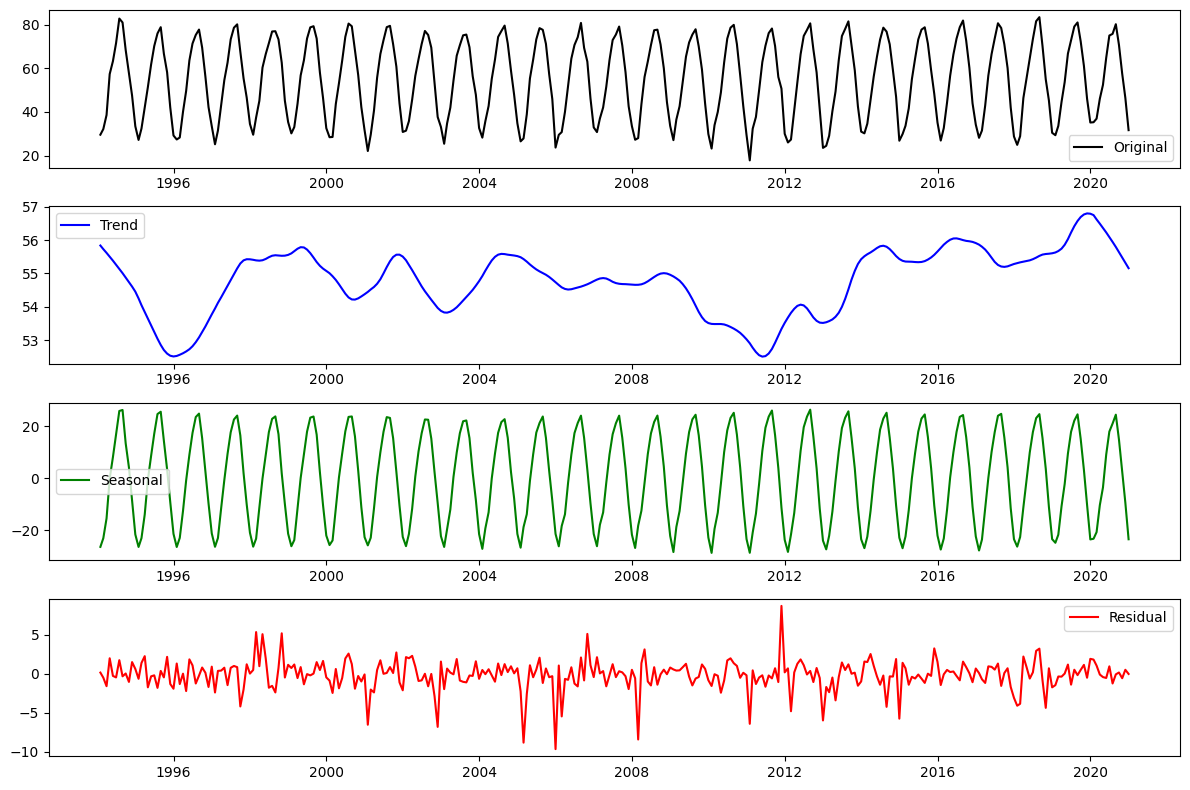

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the data
df = pd.read_csv('seoul_1994-2020.csv', parse_dates=['datetime'], index_col='datetime')

# Remove duplicate datetime entries
df = df[~df.index.duplicated(keep='first')]

# Reindex to daily frequency and interpolate missing values
df = df.asfreq('D')
df['temp'].interpolate(inplace=True)

# Resample to monthly average
monthly_temp = df['temp'].resample('M').mean()

# Apply STL decomposition
stl = STL(monthly_temp, period=12, robust=True)
result = stl.fit()

# Plot STL results
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(monthly_temp, label='Original', color='black')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.legend()
plt.tight_layout()
plt.show()


Summary statistics of monthly temperature.

Detection and interpretation of the average monthly trend change to infer a warming or cooling trend.

 four STL decomposition components

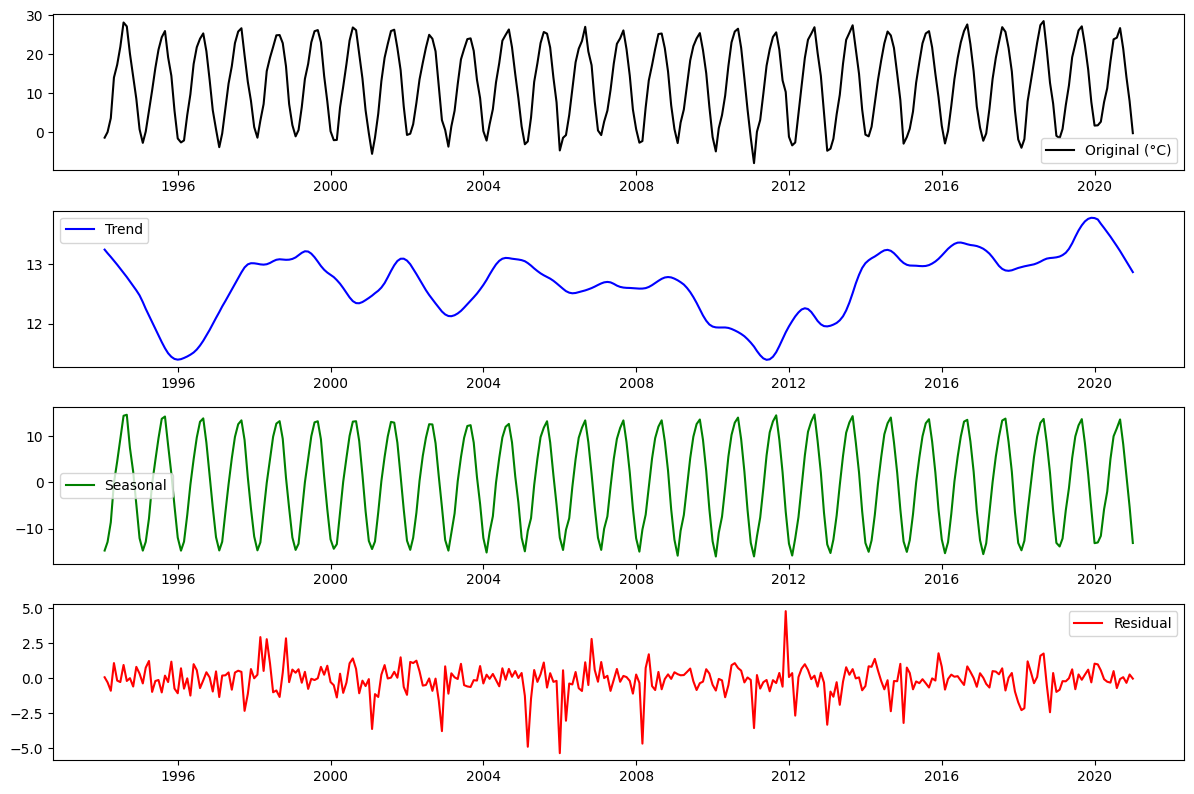

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the data
df = pd.read_csv('seoul_1994-2020.csv', parse_dates=['datetime'], index_col='datetime')

# Remove duplicate datetime entries
df = df[~df.index.duplicated(keep='first')]

# Reindex to daily frequency and interpolate missing values
df = df.asfreq('D')
df['temp'].interpolate(inplace=True)

# Convert Fahrenheit to Celsius
df['temp'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample to monthly average in Celsius
monthly_temp = df['temp'].resample('M').mean()

# Apply STL decomposition
stl = STL(monthly_temp, period=12, robust=True)
result = stl.fit()

# Plot STL results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_temp, label='Original (°C)', color='black')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()


🔹1. Original

This is the monthly average temperature data—the raw signal that combines long-term climate trends, seasonal fluctuations, and irregular changes (e.g., unusual weather events).
It’s what the temperature "really looks like" over time.

🔹 2. Trend

This shows the underlying long-term direction of the temperature changes.

It smooths out short-term ups and downs to reveal the climate trajectory (e.g., global warming signals).

If it’s going up, the region is gradually warming; if it’s going down, cooling.

🟦 In this case: Likely shows a rising trend over decades → warming climate.

🔹 3. Seasonal

This captures repeating patterns that occur at a regular frequency—in this case, yearly temperature cycles:

Peaks in summer 🌞

Dips in winter ❄️

🟩 This component highlights the expected ups and downs you’d see due to seasons—independent of any climate change.

🔹 4. Residual

These are the leftovers—what’s not explained by trend or seasonality.

Spikes or drops here may indicate extreme weather, measurement errors, or events like El Niño/La Niña.

🟥 If residuals are small and random → model fits well. If not → model might be missing something.

🔁 How it all fits together:

Original Data=Trend+Seasonality+Residual

In [8]:
df = pd.read_csv("seoul_1994-2020.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

# Convert Fahrenheit to Celsius
df['temp'] = (df['temp'] - 32) * 5.0/9.0

yearly_df = df.groupby('year').agg({
    'temp': 'mean',
    'humidity': 'mean',
    'precip': 'sum',
    'windspeed': 'mean',
    'cloudcover': 'mean',
    'dew': 'mean',
    'sealevelpressure': 'mean'
}).reset_index()


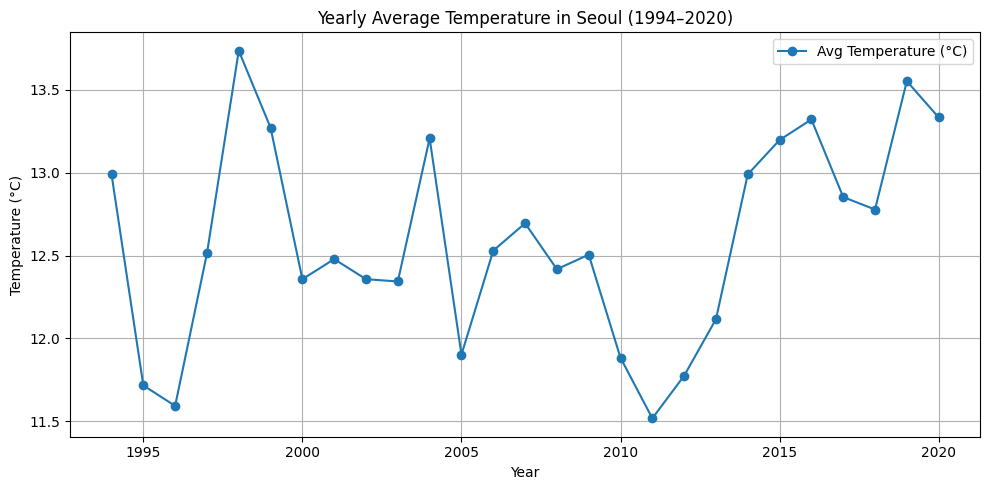

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_df['year'], yearly_df['temp'], marker='o', label='Avg Temperature (°C)')
plt.title('Yearly Average Temperature in Seoul (1994–2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



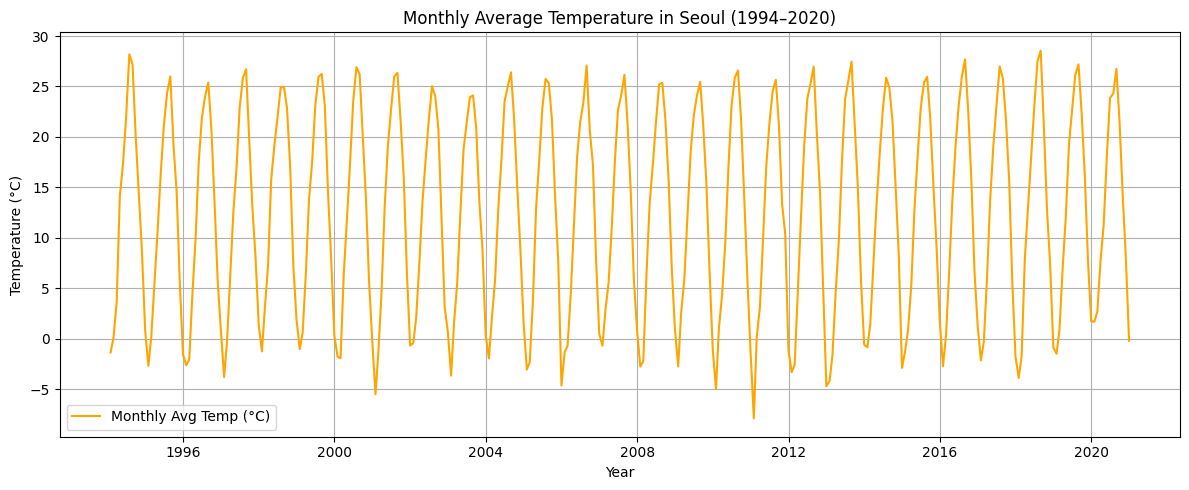

In [10]:
# Load and preprocess data
df = pd.read_csv("seoul_1994-2020.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Convert temperature from Fahrenheit to Celsius
df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample to monthly averages
temp_series_c = df['temp_celsius'].resample('M').mean().dropna()

# Plot temperature trend in Celsius
plt.figure(figsize=(12, 5))
plt.plot(temp_series_c.index, temp_series_c.values, label='Monthly Avg Temp (°C)', color='orange')
plt.title('Monthly Average Temperature in Seoul (1994–2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


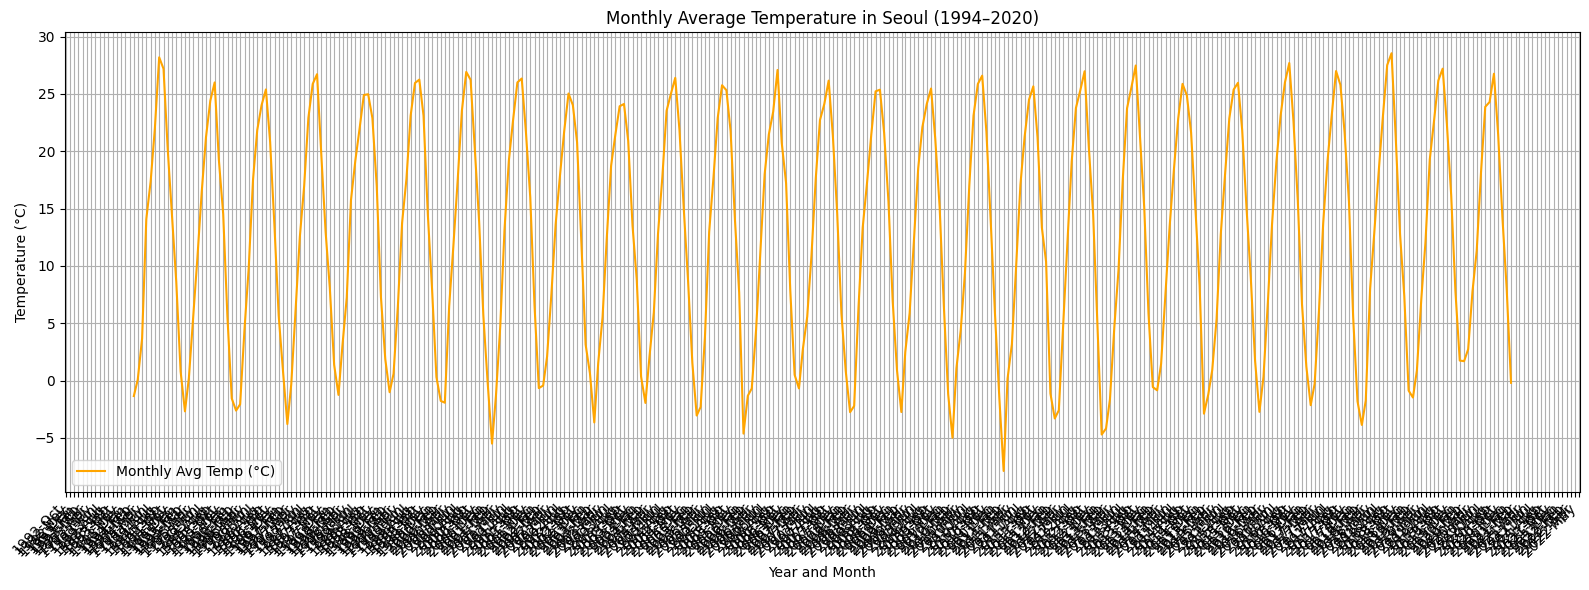

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare data
df = pd.read_csv("seoul_1994-2020.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Convert temperature from Fahrenheit to Celsius
df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample to monthly averages
temp_series_c = df['temp_celsius'].resample('M').mean().dropna()

# Plot temperature trend in Celsius
plt.figure(figsize=(16, 6))
plt.plot(temp_series_c.index, temp_series_c.values, label='Monthly Avg Temp (°C)', color='orange')
plt.title('Monthly Average Temperature in Seoul (1994–2020)')
plt.xlabel('Year and Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Set x-axis to show every month
ax = plt.gca()

# Set major ticks to start of each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month

# Format labels as "YYYY-MMM" (e.g., 1994-Jan)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# Rotate and align labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [12]:
# 2. Hurst Exponent Analysis

def hurst_exponent(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    N = len(ts)
    tau = []
    lagvec = range(2, 100)

    for lag in lagvec:
        pp = np.subtract(ts[lag:], ts[:-lag])
        tau.append(np.std(pp))

    hurst = np.polyfit(np.log(lagvec), np.log(tau), 1)[0]
    return hurst

# Compute Hurst exponent on daily average temperature
temperature_series = df['temp'].values
H = hurst_exponent(temperature_series)

print(f"Hurst Exponent for temperature series: {H:.4f}")

# Interpretation
if H < 0.5:
    print("The series is anti-persistent (mean-reverting).")
elif H > 0.5:
    print("The series is persistent (trending).")
else:
    print("The series is likely a random walk.")


Hurst Exponent for temperature series: 0.4898
The series is anti-persistent (mean-reverting).


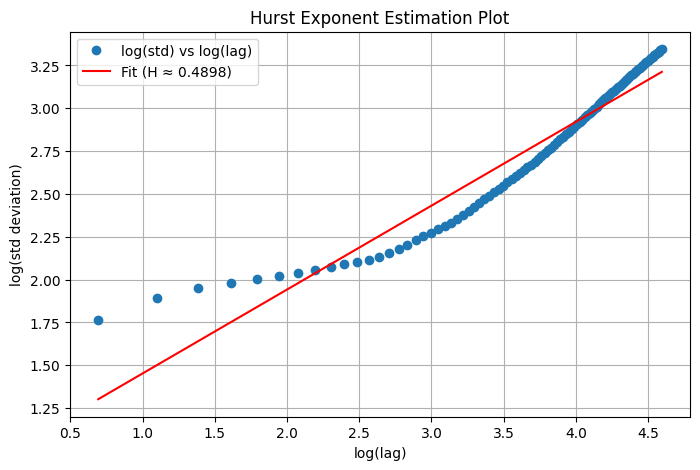

Estimated Hurst Exponent (from plot): 0.4898


In [13]:
# 2 (Extended). Plotting the Hurst Exponent

import matplotlib.pyplot as plt

def hurst_exponent_plot(ts):
    lagvec = range(2, 100)
    tau = [np.std(ts[lag:] - ts[:-lag]) for lag in lagvec]
    log_lag = np.log(lagvec)
    log_tau = np.log(tau)

    # Linear fit to estimate the Hurst exponent
    hurst = np.polyfit(log_lag, log_tau, 1)[0]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(log_lag, log_tau, 'o', label='log(std) vs log(lag)')
    plt.plot(log_lag, np.poly1d(np.polyfit(log_lag, log_tau, 1))(log_lag),
             color='red', label=f'Fit (H ≈ {hurst:.4f})')
    plt.xlabel("log(lag)")
    plt.ylabel("log(std deviation)")
    plt.title("Hurst Exponent Estimation Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

    return hurst

# Run on temperature data
H_plot = hurst_exponent_plot(df['temp'].values)
print(f"Estimated Hurst Exponent (from plot): {H_plot:.4f}")


The Hurst exponent (H) is a measure used to evaluate the long-term memory or persistence of a time series — including in weather prediction models.

The Hurst exponent helps determine whether a time series is:

Persistent (Trending)

Random (No memory)

Anti-persistent (Mean-reverting)

| H Value Range | Interpretation | Meaning for Weather Prediction |
|---------------|----------------|--------------------------------|
| **H < 0.5**   | **Anti-persistent** | The weather tends to **reverse direction** — e.g., a hot day is likely followed by a cooler day. |
| **H ≈ 0.5**   | **Random Walk (Brownian motion)** | The weather behaves like **white noise**, with **no predictable pattern**. |
| **H > 0.5**   | **Persistent** | Trends are **likely to continue** — e.g., a warm trend may persist over time. |

Hurst Exponent ≈ 0.49, the temperature series is very close to a random walk, meaning it’s neither strongly trending nor strongly mean-reverting — so we’ll test both statistical and machine learning models to see what performs best.

ARIMA Model (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


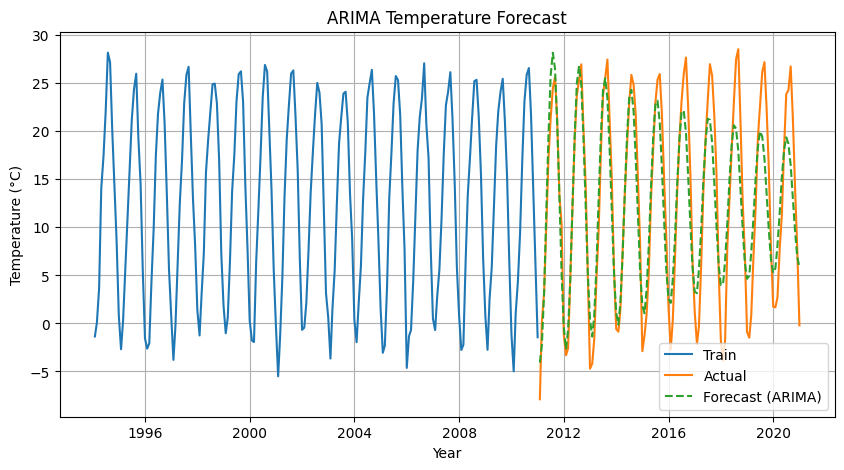

ARIMA RMSE: 4.1349
ARIMA MAE : 3.2457


In [14]:
# 3.1 ARIMA Model for temperature forecasting

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert temperature from Fahrenheit to Celsius
df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample to monthly averages
temp_monthly = df['temp_celsius'].resample('M').mean().dropna()

# Use only the temperature column and resample to monthly averages
#temp_monthly = df['temp'].resample('M').mean()

# Train-test split
train = temp_monthly[:-120]  # Last 10 years (~120 months) as test
test = temp_monthly[-120:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 2))  # can tune this using AIC/BIC or auto_arima
arima_result = model.fit()

# Forecast
forecast_arima = arima_result.forecast(steps=120)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_arima, label='Forecast (ARIMA)', linestyle='--')
plt.legend()
plt.title("ARIMA Temperature Forecast")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Metrics
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mae_arima = mean_absolute_error(test, forecast_arima)

print(f"ARIMA RMSE: {rmse_arima:.4f}")
print(f"ARIMA MAE : {mae_arima:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


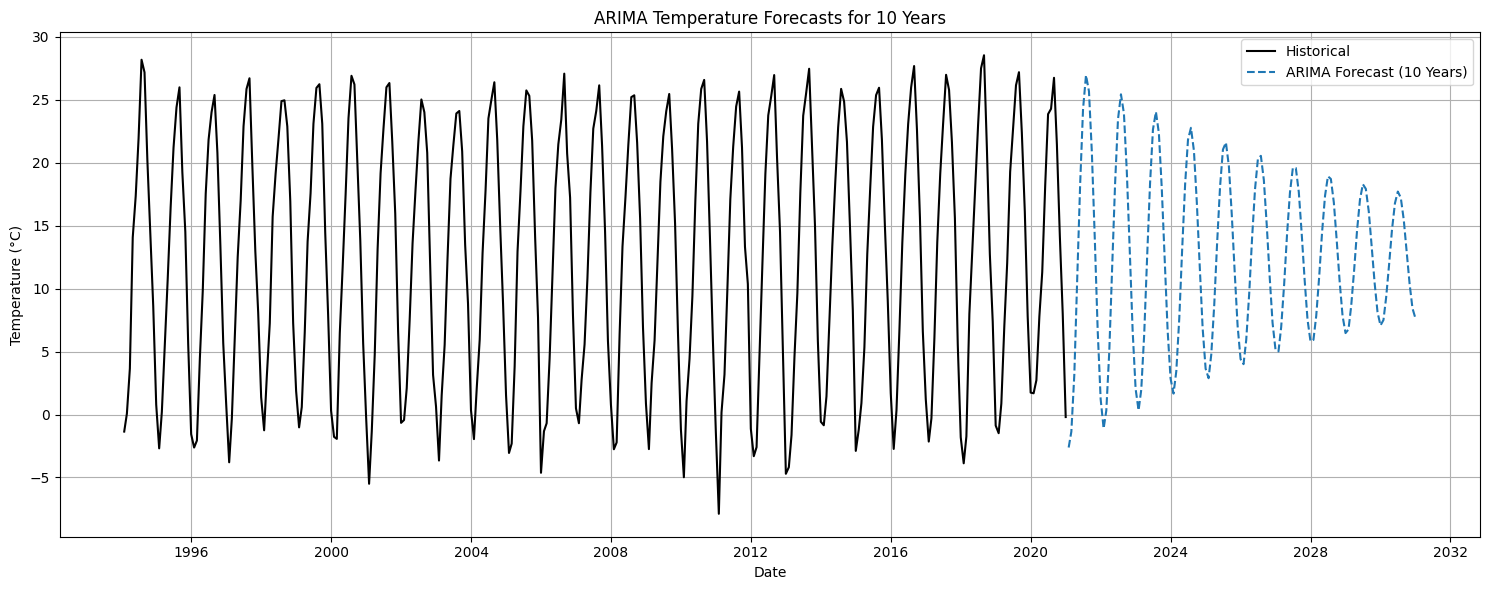

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Convert temperature from Fahrenheit to Celsius
df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample to monthly averages
temp_monthly = df['temp_celsius'].resample('M').mean().dropna()

# Train ARIMA model on full dataset
model = ARIMA(temp_monthly, order=(5, 1, 2))  # adjust as needed
arima_result = model.fit()

# Forecast horizons in months
forecast_horizons = {
    '10 Years': 120,
    #'25 Years': 300,
    #'50 Years': 600,
    #'100 Years': 1200
}

# Generate forecasts and plot
plt.figure(figsize=(15, 6))
plt.plot(temp_monthly.index, temp_monthly, label='Historical', color='black')

for label, steps in forecast_horizons.items():
    forecast_future = arima_result.forecast(steps=steps)
    future_index = pd.date_range(start=temp_monthly.index[-1] + pd.DateOffset(months=1), periods=steps, freq='M')
    plt.plot(future_index, forecast_future, label=f'ARIMA Forecast ({label})', linestyle='--')

#plt.title("ARIMA Temperature Forecasts for 10, 25, 50, and 100 Years")
plt.title("ARIMA Temperature Forecasts for 10 Years")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Residual Formula:
residuals=actual values−predicted values (forecast)


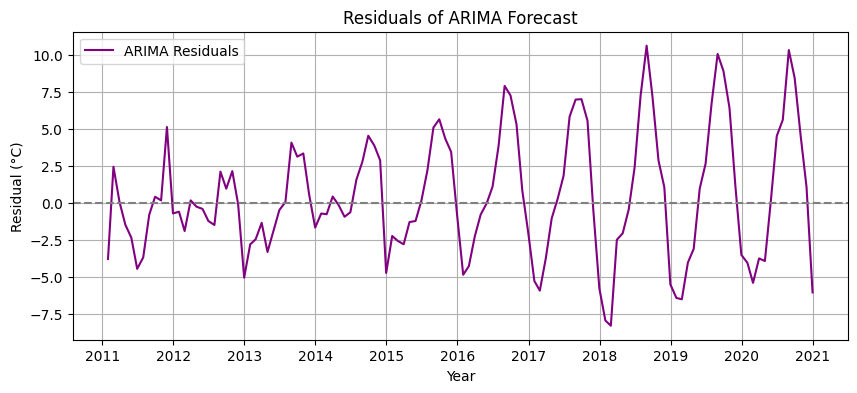

Residual Summary Statistics:
count    120.000000
mean       0.372589
std        4.135375
min       -8.317308
25%       -2.401170
50%       -0.134454
75%        2.919366
max       10.594614
dtype: float64


In [16]:
residuals_arima = test - forecast_arima

# Optional: visualize residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals_arima, label='ARIMA Residuals', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals of ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Residual (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: basic stats
print("Residual Summary Statistics:")
print(residuals_arima.describe())


 Random Forest Regressor (using lag features)

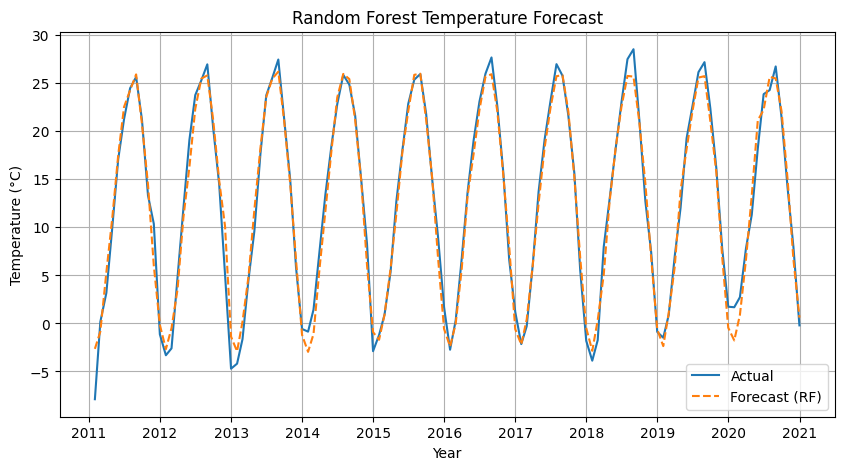

Random Forest RMSE: 1.5103
Random Forest MAE : 1.1416


In [ ]:
# 3.2 Random Forest Regressor with lag features

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create lag features
lag_df = pd.DataFrame()
for i in range(1, 13):  # 12-month lags
    lag_df[f'lag_{i}'] = temp_monthly.shift(i)

lag_df['target'] = temp_monthly.values
lag_df.dropna(inplace=True)

# Split
X = lag_df.drop(columns='target')
y = lag_df['target']
X_train, X_test, y_train, y_test = X[:-120], X[-120:], y[:-120], y[-120:]

# Fit model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_preds, label='Forecast (RF)', linestyle='--')
plt.legend()
plt.title("Random Forest Temperature Forecast")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
mae_rf = mean_absolute_error(y_test, rf_preds)

print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest MAE : {mae_rf:.4f}")


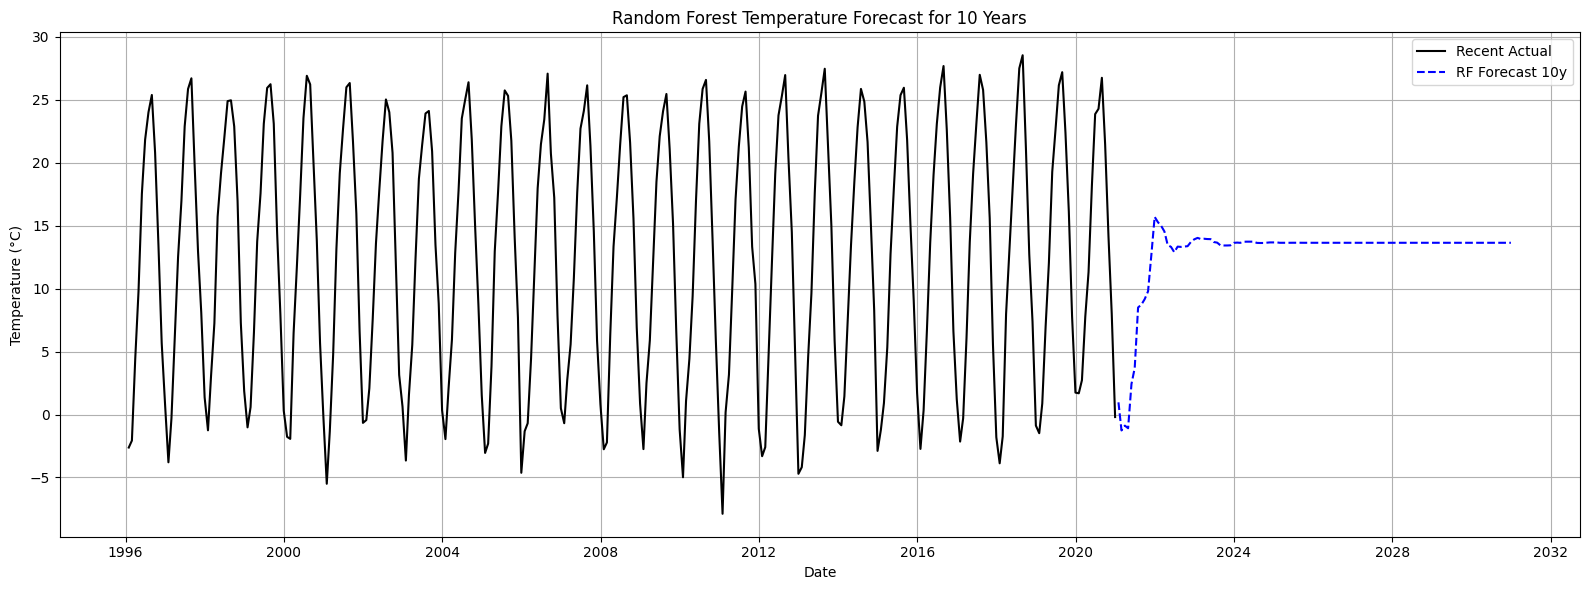

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create lag features
def create_lagged_features(series, n_lags=12):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = series.shift(i)
    df['target'] = series.values
    df.dropna(inplace=True)
    return df

# Generate lagged dataset
lag_df = create_lagged_features(temp_monthly, n_lags=12)

# Split
X = lag_df.drop(columns='target')
y = lag_df['target']
X_train, X_test, y_train, y_test = X[:-120], X[-120:], y[:-120], y[-120:]

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Forecasting Future Values
def forecast_rf(model, last_values, n_months):
    future_preds = []
    history = list(last_values)  # start from the last 12 months

    for _ in range(n_months):
        X_pred = np.array(history[-12:]).reshape(1, -1)
        pred = model.predict(X_pred)[0]
        future_preds.append(pred)
        history.append(pred)  # append prediction for next lag

    return future_preds

# Last 12 values from the original monthly series
last_12 = temp_monthly[-12:]

# Forecast periods in months
years_to_forecast = [10]
#years_to_forecast = [10, 25, 50, 100]
months_to_forecast = [y * 12 for y in years_to_forecast]

# Generate date index for forecasts
start_date = temp_monthly.index[-1] + pd.DateOffset(months=1)
dates = {
    year: pd.date_range(start=start_date, periods=months, freq='M')
    for year, months in zip(years_to_forecast, months_to_forecast)
}

# Forecasts
rf_forecasts = {
    year: forecast_rf(rf, last_12.values, months)
    for year, months in zip(years_to_forecast, months_to_forecast)
}

# Plot results
plt.figure(figsize=(16, 6))
plt.plot(temp_monthly.index[-300:], temp_monthly.values[-300:], label='Recent Actual', color='black')
colors = ['blue', 'green', 'orange', 'red']

for (year, forecast), color in zip(rf_forecasts.items(), colors):
    plt.plot(dates[year], forecast, label=f'RF Forecast {year}y', linestyle='--', color=color)

plt.title('Random Forest Temperature Forecast for 10 Years')
#plt.title('Random Forest Temperature Forecast for 10, 25, 50, and 100 Years')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Hybrid Model (ARIMA Residuals → Random Forest)

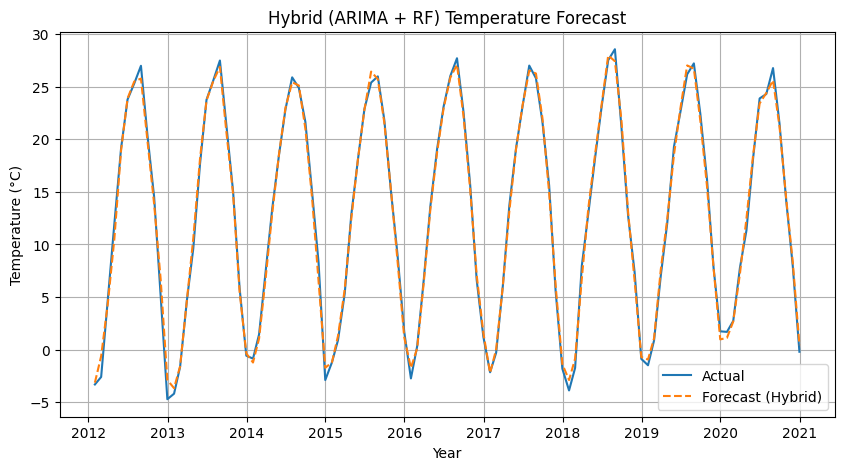

Hybrid Model RMSE: 0.6406
Hybrid Model MAE : 0.4983


In [ ]:
# 3.3 Hybrid Model: ARIMA + RF on Residuals

# Step 1: Get residuals from ARIMA
residuals = test - forecast_arima

# Step 2: Train RF on ARIMA residuals
residual_lag = pd.DataFrame()
for i in range(1, 13):
    residual_lag[f'lag_{i}'] = residuals.shift(i)

residual_lag['residual'] = residuals.values
residual_lag.dropna(inplace=True)

X_res = residual_lag.drop(columns='residual')
y_res = residual_lag['residual']

rf_resid = RandomForestRegressor(n_estimators=200, random_state=42)
rf_resid.fit(X_res, y_res)

# Step 3: Predict residuals and correct ARIMA forecast
predicted_resid = rf_resid.predict(X_res)
hybrid_forecast = forecast_arima[-len(predicted_resid):] + predicted_resid

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index[-len(predicted_resid):], test[-len(predicted_resid):], label='Actual')
plt.plot(test.index[-len(predicted_resid):], hybrid_forecast, label='Forecast (Hybrid)', linestyle='--')
plt.legend()
plt.title("Hybrid (ARIMA + RF) Temperature Forecast")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Metrics
rmse_hybrid = np.sqrt(mean_squared_error(test[-len(predicted_resid):], hybrid_forecast))
mae_hybrid = mean_absolute_error(test[-len(predicted_resid):], hybrid_forecast)

print(f"Hybrid Model RMSE: {rmse_hybrid:.4f}")
print(f"Hybrid Model MAE : {mae_hybrid:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


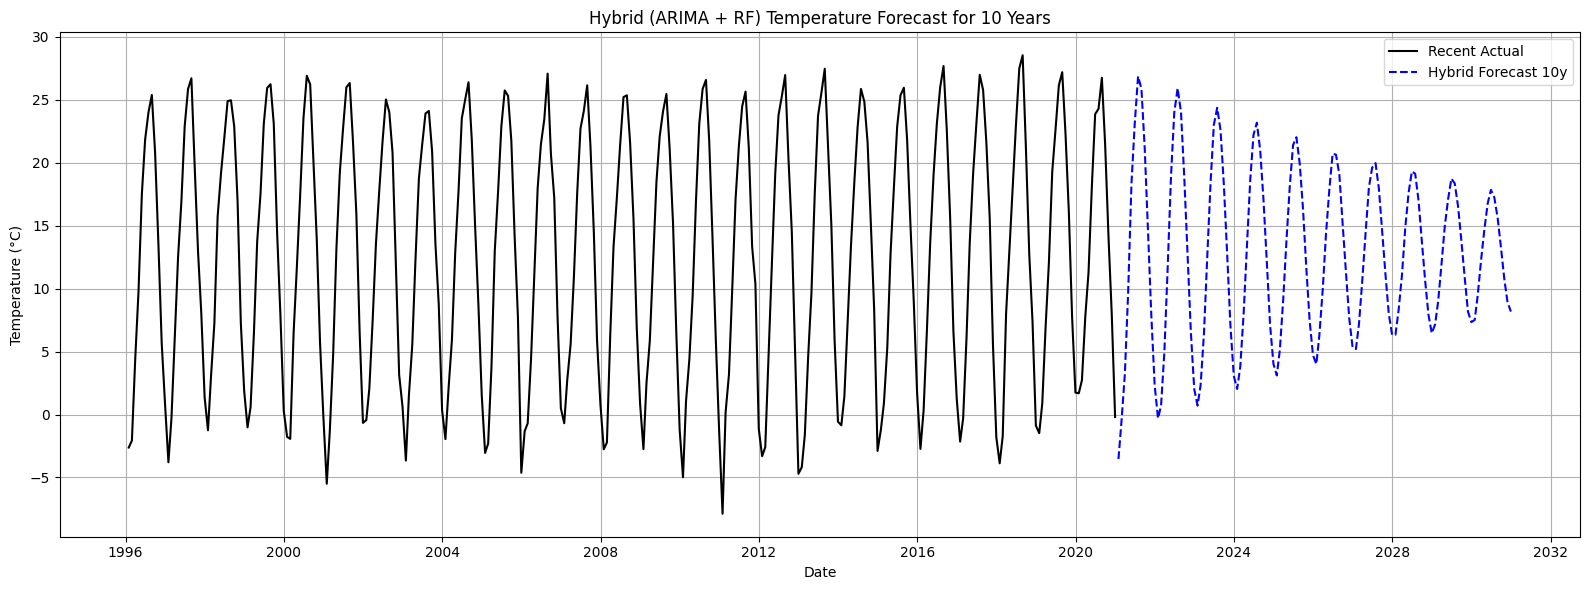

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---- ARIMA Fit on full data ----
model_full = ARIMA(temp_monthly, order=(5, 1, 2))
arima_result_full = model_full.fit()

# ---- Forecasting with ARIMA ----
years_to_forecast = [10]
#years_to_forecast = [10, 25, 50, 100]
months_to_forecast = [y * 12 for y in years_to_forecast]

# Keep latest residuals for RF modeling
arima_pred_in_sample = arima_result.predict(start=test.index[0], end=test.index[-1])
residuals = test - arima_pred_in_sample

# ---- Prepare lag features on residuals ----
def create_lagged_residuals(residuals, n_lags=12):
    df = pd.DataFrame()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = residuals.shift(i)
    df['residual'] = residuals.values
    df.dropna(inplace=True)
    return df

resid_lag_df = create_lagged_residuals(residuals, n_lags=12)
X_res = resid_lag_df.drop(columns='residual')
y_res = resid_lag_df['residual']

# ---- Train RF on residuals ----
rf_resid = RandomForestRegressor(n_estimators=200, random_state=42)
rf_resid.fit(X_res, y_res)

# ---- Forecast future ARIMA and residuals ----
def hybrid_forecast_arima_rf(arima_model, rf_model, last_resids, steps):
    arima_forecast = arima_model.forecast(steps=steps)
    residual_preds = []

    history = list(last_resids[-12:].values)

    for _ in range(steps):
        X_pred = np.array(history[-12:]).reshape(1, -1)
        pred_res = rf_model.predict(X_pred)[0]
        residual_preds.append(pred_res)
        history.append(pred_res)

    hybrid_forecast = arima_forecast + residual_preds
    return hybrid_forecast, arima_forecast, residual_preds

# Start forecast date
start_date = temp_monthly.index[-1] + pd.DateOffset(months=1)
forecast_dates = {
    y: pd.date_range(start=start_date, periods=months, freq='M')
    for y, months in zip(years_to_forecast, months_to_forecast)
}

# Perform hybrid forecasts
hybrid_forecasts = {}
for y, months in zip(years_to_forecast, months_to_forecast):
    hybrid, arima_only, resid_pred = hybrid_forecast_arima_rf(arima_result_full, rf_resid, residuals, months)
    hybrid_forecasts[y] = hybrid

# ---- Plotting ----
plt.figure(figsize=(16, 6))
plt.plot(temp_monthly.index[-300:], temp_monthly.values[-300:], label='Recent Actual', color='black')
colors = ['blue', 'green', 'orange', 'red']

for (year, forecast), color in zip(hybrid_forecasts.items(), colors):
    plt.plot(forecast_dates[year], forecast, label=f'Hybrid Forecast {year}y', linestyle='--', color=color)

plt.title('Hybrid (ARIMA + RF) Temperature Forecast for 10 Years')
#plt.title('Hybrid (ARIMA + RF) Temperature Forecast for 10, 25, 50, and 100 Years')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


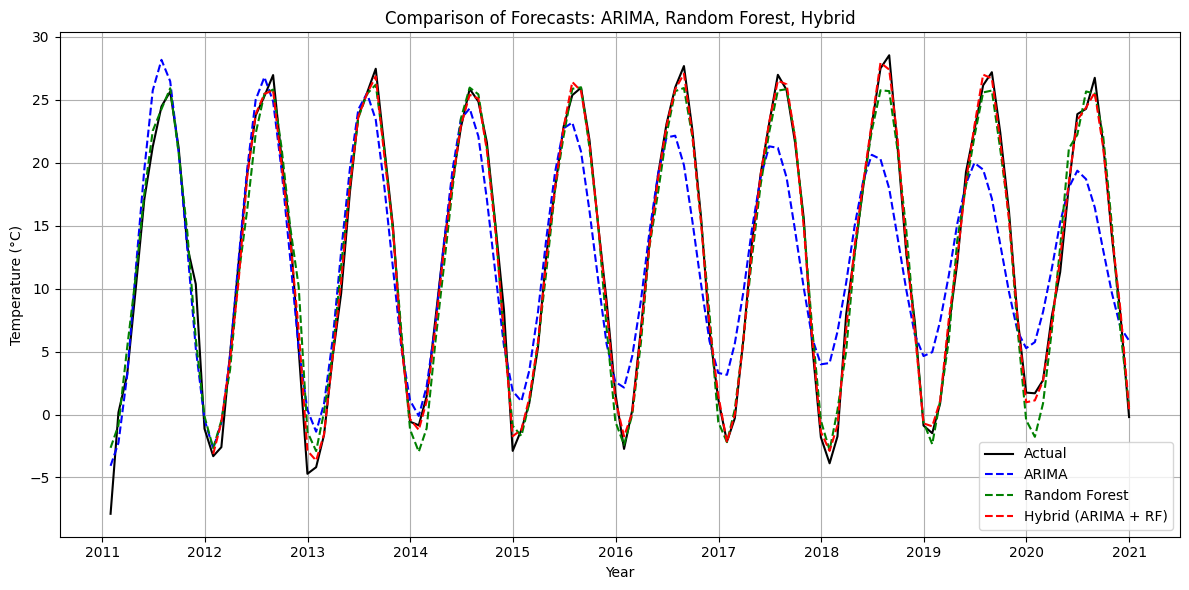

In [ ]:
# Combined plot of actual and all three model forecasts

plt.figure(figsize=(12, 6))

# Plot actual test data
plt.plot(test.index, test, label='Actual', color='black')

# Plot ARIMA forecast
plt.plot(test.index, forecast_arima, label='ARIMA', linestyle='--', color='blue')

# Plot RF forecast
plt.plot(y_test.index, rf_preds, label='Random Forest', linestyle='--', color='green')

# Plot Hybrid forecast (on aligned index)
aligned_idx = test.index[-len(predicted_resid):]
plt.plot(aligned_idx, hybrid_forecast, label='Hybrid (ARIMA + RF)', linestyle='--', color='red')

# Formatting
plt.title("Comparison of Forecasts: ARIMA, Random Forest, Hybrid")
#plt.xlabel("Date")
#plt.ylabel("Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Deep Learning Models – LSTM, GRU, and CVG (SU-RNN)
We'll work through these steps:
1.   Data scaling & windowing
2.   LSTM model
3.   GRU model
4.   CVG/SU-RNN model (simple stacked RNN variant)
5.   Evaluation with RMSE, MAE, PHYS

Data Preprocessing for DL Models

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample to monthly and scale
#temp = df['temp'].resample('M').mean().values.reshape(-1, 1)
temp = df['temp_celsius'].resample('M').mean().values.reshape(-1, 1)

scaler = MinMaxScaler()
temp_scaled = scaler.fit_transform(temp)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(temp_scaled, window_size)

# Split into train/test sets
split = len(X) - 120  # Last 10 years for testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Define & Train LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTM model
model_lstm = Sequential([
    LSTM(64, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict
lstm_preds = model_lstm.predict(X_test)
lstm_preds_inv = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Define & Train GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

# GRU model
model_gru = Sequential([
    GRU(64, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict
gru_preds = model_gru.predict(X_test)
gru_preds_inv = scaler.inverse_transform(gru_preds)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 Define & Train CVG (SU-RNN) Model

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# CVG / SU-RNN model (simple stacked RNN)
model_rnn = Sequential([
    SimpleRNN(64, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict in consistent batches
batch_size = 32
rnn_preds = model_rnn.predict(X_test, batch_size=batch_size)

# Predict
#rnn_preds = model_rnn.predict(X_test)
rnn_preds_inv = scaler.inverse_transform(rnn_preds)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 Evaluation: RMSE, MAE, PHYS
 We'll compute:

1.   RMSE: Root Mean Squared Error
2.   MAE: Mean Absolute Error
3.   PHYS: Percent Hit Year Similarity (custom metric we'll define next)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE : {mae:.4f}")
    return rmse, mae

rmse_lstm, mae_lstm = evaluate(y_test_inv, lstm_preds_inv, "LSTM")
rmse_gru, mae_gru = evaluate(y_test_inv, gru_preds_inv, "GRU")
rmse_rnn, mae_rnn = evaluate(y_test_inv, rnn_preds_inv, "CVG (SU-RNN)")


LSTM RMSE: 1.4956
LSTM MAE : 1.1760
GRU RMSE: 1.5290
GRU MAE : 1.1724
CVG (SU-RNN) RMSE: 1.6559
CVG (SU-RNN) MAE : 1.2893


 Combined Forecast Plot – LSTM, GRU, CVG (SU-RNN)

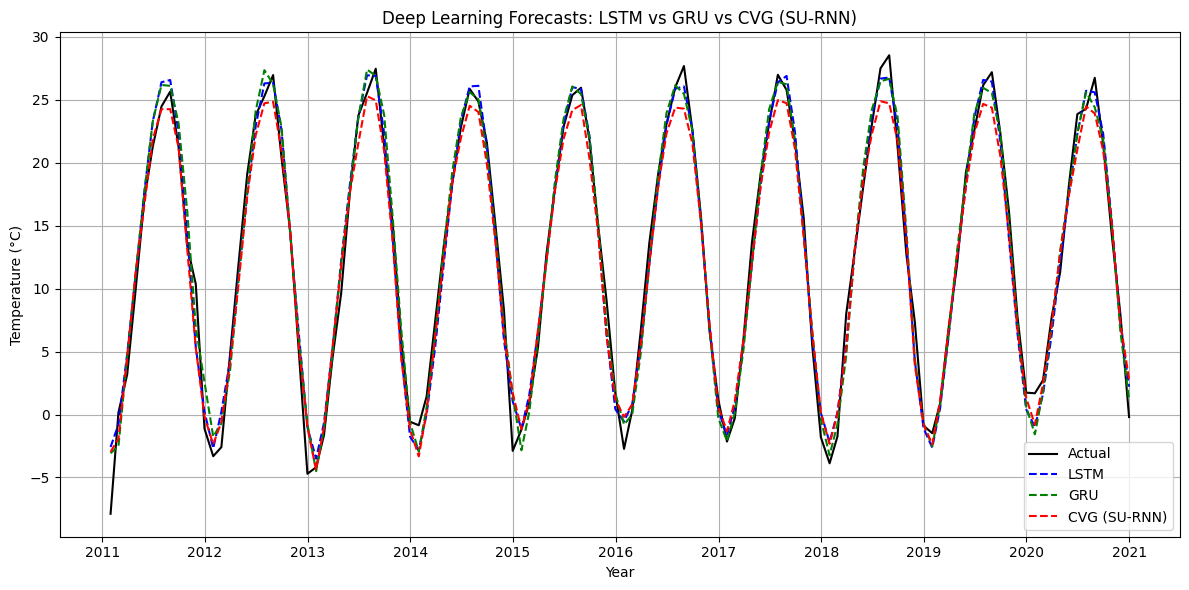

In [ ]:
# Prepare date range for test period (monthly)
# Convert temperature from Fahrenheit to Celsius

df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0
# Resample to monthly averages
test_dates = df['temp_celsius'].resample('M').mean().index[-120:]

#test_dates = df['temp_celsius'].resample('M').mean().index[-120:]

#test_dates = df['temp'].resample('M').mean().index[-120:]

plt.figure(figsize=(12, 6))

# Plot actual temperatures
plt.plot(test_dates, y_test_inv, label='Actual', color='black')

# Plot predictions
plt.plot(test_dates, lstm_preds_inv, label='LSTM', linestyle='--', color='blue')
plt.plot(test_dates, gru_preds_inv, label='GRU', linestyle='--', color='green')
plt.plot(test_dates, rnn_preds_inv, label='CVG (SU-RNN)', linestyle='--', color='red')

# Format
plt.title("Deep Learning Forecasts: LSTM vs GRU vs CVG (SU-RNN)")
#plt.xlabel("Date")
#plt.ylabel("Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


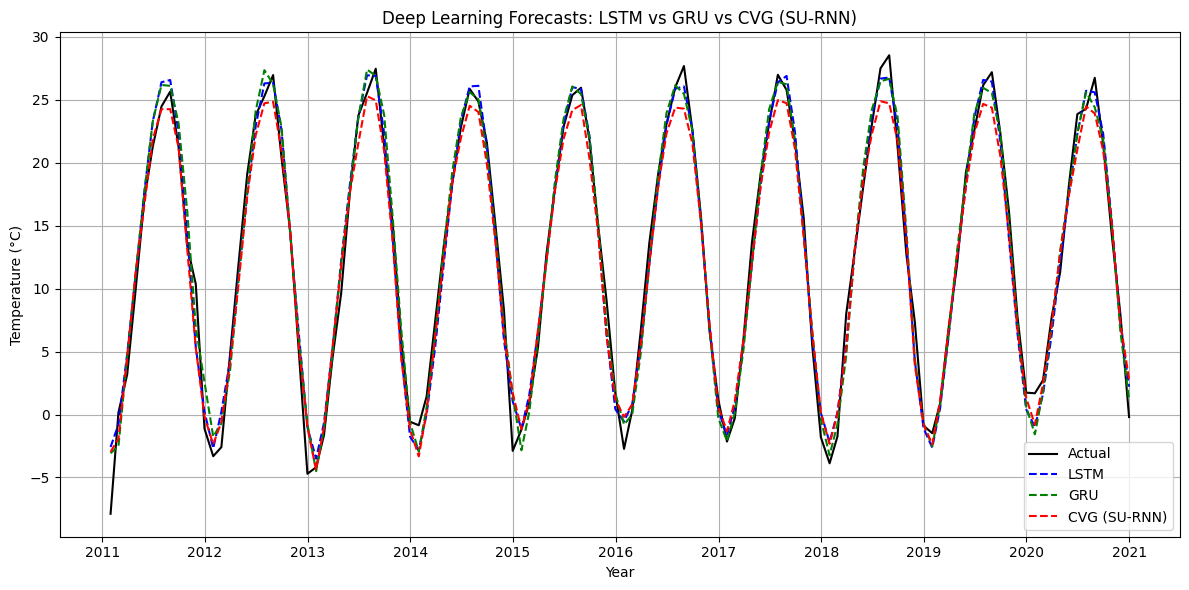

In [ ]:
import matplotlib.pyplot as plt

# Convert Fahrenheit to Celsius
df['temp_celsius'] = (df['temp'] - 32) * 5.0 / 9.0

# Resample temperature to monthly averages
monthly_temp_c = df['temp_celsius'].resample('M').mean()

# Prepare test period dates
test_dates = monthly_temp_c.index[-120:]  # Last 10 years if monthly

# Plot Deep Learning Forecasts (LSTM, GRU, CVG/SU-RNN)
plt.figure(figsize=(12, 6))

# Plot actual
plt.plot(test_dates, y_test_inv, label='Actual', color='black')

# Plot models
plt.plot(test_dates, lstm_preds_inv, label='LSTM', linestyle='--', color='blue')
plt.plot(test_dates, gru_preds_inv, label='GRU', linestyle='--', color='green')
plt.plot(test_dates, rnn_preds_inv, label='CVG (SU-RNN)', linestyle='--', color='red')

# Labels and formatting
plt.title("Deep Learning Forecasts: LSTM vs GRU vs CVG (SU-RNN)")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PHYS Metric & Long-Term Forecasts (10, & 25 Years):
Define PHYS (Percent Hit Year Similarity)

PHYS compares how well predicted yearly patterns match actual yearly averages. It's useful for long-term weather similarity.

Here’s how we define it:
1.   Group true and predicted temps by year.
2.   Compute yearly averages.
3.   Calculate percent similarity.

In [ ]:
# Define PHYS metric
def phys_metric(y_true_series, y_pred_series, dates):
    df_phys = pd.DataFrame({
        'date': dates,
        'true': y_true_series.flatten(),
        'pred': y_pred_series.flatten()
    })
    df_phys['year'] = df_phys['date'].dt.year

    # Yearly averages
    yearly_true = df_phys.groupby('year')['true'].mean()
    yearly_pred = df_phys.groupby('year')['pred'].mean()

    # Calculate percent similarity per year
    similarity = 100 * (1 - abs(yearly_true - yearly_pred) / yearly_true)
    phys = similarity.mean()
    return phys

# Run PHYS for each model
phys_lstm = phys_metric(y_test_inv, lstm_preds_inv, test_dates)
phys_gru = phys_metric(y_test_inv, gru_preds_inv, test_dates)
phys_rnn = phys_metric(y_test_inv, rnn_preds_inv, test_dates)

print(f"LSTM PHYS: {phys_lstm:.2f}%")
print(f"GRU PHYS : {phys_gru:.2f}%")
print(f"CVG PHYS : {phys_rnn:.2f}%")


LSTM PHYS: 97.02%
GRU PHYS : 96.67%
CVG PHYS : 96.21%


In [ ]:
''' def forecast_future(model, last_window, n_steps, scaler):
    predictions = []
    current_input = last_window.copy()

    for _ in range(n_steps):
        pred = model.predict(current_input[np.newaxis, :, :])[0]
        predictions.append(pred)
        # Append new prediction and slide window
        current_input = np.append(current_input[1:], [pred], axis=0)

    return scaler.inverse_transform(predictions)

# Last window from the original series
last_seq = temp_scaled[-window_size:]

# Monthly steps
months_10y = 12 * 10
months_100y = 12 * 100

# Forecasts
future_10_lstm = forecast_future(model_lstm, last_seq, months_10y, scaler)
future_100_lstm = forecast_future(model_lstm, last_seq, months_100y, scaler)

# Create future date index
last_date = df['temp'].resample('M').mean().index[-1]
future_dates_10 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_10y, freq='M')
future_dates_100 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_100y, freq='M')'''


Forecast the Next 10 and 25 Years

In [ ]:
def fast_forecast_future(model, last_window, n_steps, scaler):
    predictions = []
    current_input = last_window.copy()

    for _ in range(n_steps):
        # Prepare input batch (1, window_size, 1)
        input_batch = current_input[np.newaxis, :, :]
        pred = model.predict(input_batch, verbose=0)[0]
        predictions.append(pred)

        # Slide window
        current_input = np.append(current_input[1:], [pred], axis=0)

    # Convert to proper shape for inverse_transform
    predictions = np.array(predictions).reshape(-1, 1)
    return scaler.inverse_transform(predictions)

# Last window from the original series
last_seq = temp_scaled[-window_size:]

# Monthly steps
months_10y = 12 * 10
months_25y = 12 * 25
#months_100y = 12 * 100

# Forecasts
future_10_lstm = fast_forecast_future(model_lstm, last_seq, months_10y, scaler)
future_25_lstm = fast_forecast_future(model_lstm, last_seq, months_25y, scaler)
#future_100_lstm = fast_forecast_future(model_lstm, last_seq, months_100y, scaler)

# Create future date index
last_date = df['temp'].resample('M').mean().index[-1]
future_dates_10 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_10y, freq='M')
future_dates_25 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_25y, freq='M')


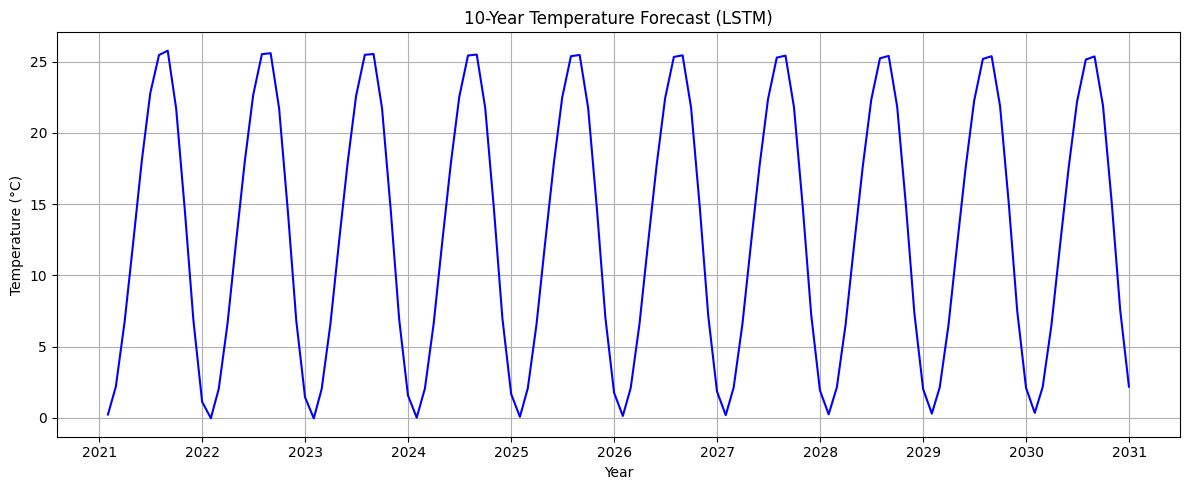

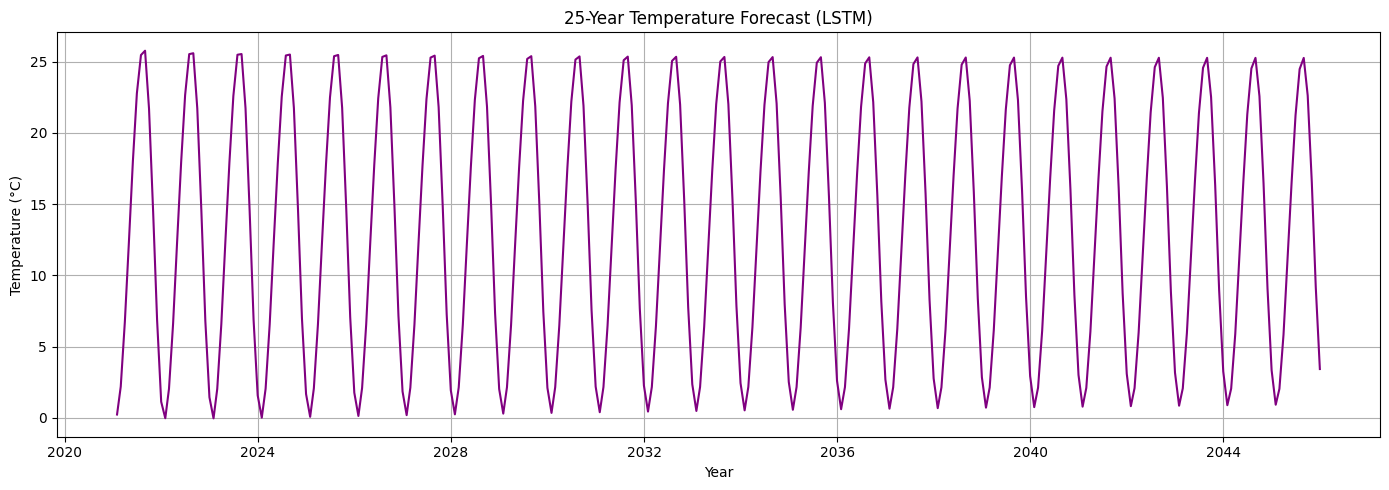

In [ ]:
# Plot 10-year forecast
plt.figure(figsize=(12, 5))
plt.plot(future_dates_10, future_10_lstm, label='Forecast (LSTM)', color='blue')
plt.title("10-Year Temperature Forecast (LSTM)")
#plt.xlabel("Date")
#plt.ylabel("Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 25-year forecast
plt.figure(figsize=(14, 5))
plt.plot(future_dates_25, future_25_lstm, label='Forecast (LSTM)', color='purple')
plt.title("25-Year Temperature Forecast (LSTM)")
#plt.xlabel("Date")
#plt.ylabel("Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
'''def forecast_future(model, last_window, n_steps, scaler):
    predictions = []
    current_input = last_window.copy()

    for _ in range(n_steps):
        pred = model.predict(current_input[np.newaxis, :, :])[0]
        predictions.append(pred)
        current_input = np.append(current_input[1:], [pred], axis=0)

    return scaler.inverse_transform(predictions)

# Forecasting horizon
months_10y = 12 * 10  # 10 years
months_100y = 12 * 100  # 100 years

# Forecast from last sequence
future_10_gru = forecast_future(model_gru, last_seq, months_10y, scaler)
future_100_gru = forecast_future(model_gru, last_seq, months_100y, scaler)

future_10_rnn = forecast_future(model_rnn, last_seq, months_10y, scaler)
future_100_rnn = forecast_future(model_rnn, last_seq, months_100y, scaler)

# Future time indexes
future_dates_10 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_10y, freq='M')
future_dates_100 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_100y, freq='M')

# Plot 10-Year Forecasts
plt.figure(figsize=(12, 5))
plt.plot(future_dates_10, future_10_gru, label='GRU', color='green')
plt.plot(future_dates_10, future_10_rnn, label='CVG (SU-RNN)', color='red')
plt.title("10-Year Forecast (GRU & SU-RNN)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 100-Year Forecasts
plt.figure(figsize=(14, 5))
plt.plot(future_dates_100, future_100_gru, label='GRU', color='green')
plt.plot(future_dates_100, future_100_rnn, label='CVG (SU-RNN)', color='red')
plt.title("100-Year Forecast (GRU & SU-RNN)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''

In [ ]:
'''def fast_forecast_future(model, last_window, n_steps, scaler):
    window_size = last_window.shape[0]
    n_features = last_window.shape[1]

    # Pre-allocate for speed
    inputs = np.zeros((n_steps, window_size, n_features))
    predictions = np.zeros((n_steps, n_features))

    # Initialize first window
    inputs[0] = last_window

    # Loop efficiently: create all windows
    for i in range(1, n_steps):
        # Predict using previous window
        pred = model.predict(inputs[i - 1][np.newaxis, :, :], verbose=0)[0]
        predictions[i - 1] = pred

        # Construct next input window
        next_input = np.append(inputs[i - 1][1:], [pred], axis=0)
        inputs[i] = next_input

    # Last prediction
    predictions[-1] = model.predict(inputs[-1][np.newaxis, :, :], verbose=0)[0]

    return scaler.inverse_transform(predictions)'''


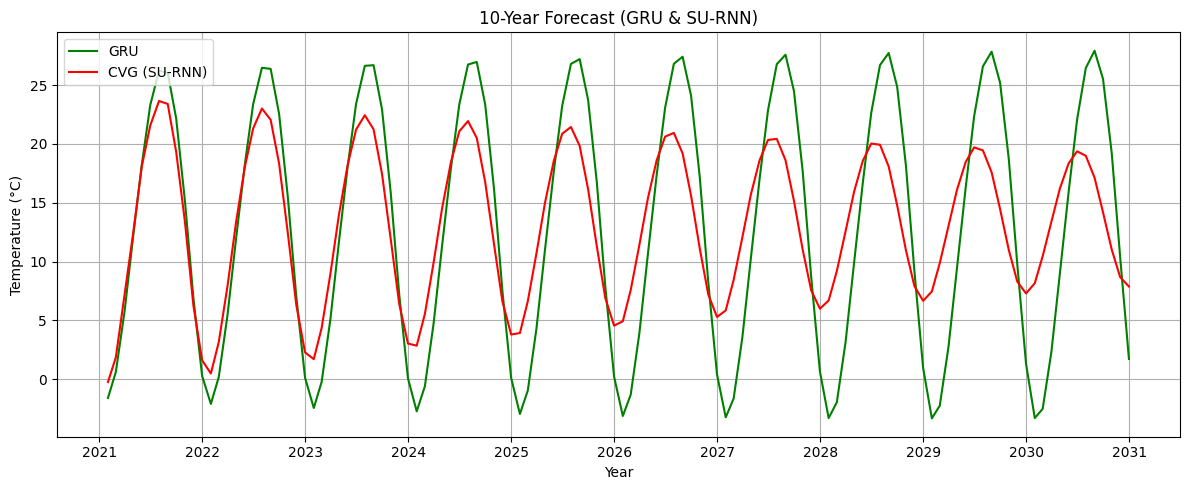

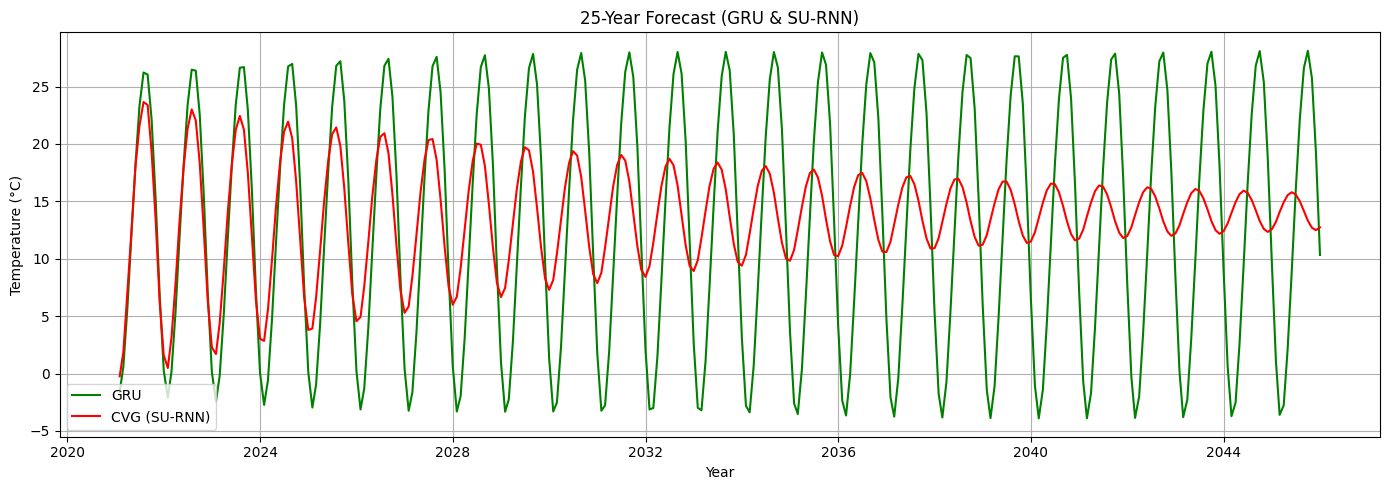

In [ ]:
# Forecasting horizon
months_10y = 12 * 10  # 10 years
months_25y = 12 * 25  # 25 years
#months_100y = 12 * 100  # 100 years

# Forecast from last sequence
future_10_gru = fast_forecast_future(model_gru, last_seq, months_10y, scaler)
future_25_gru = fast_forecast_future(model_gru, last_seq, months_25y, scaler)

future_10_rnn = fast_forecast_future(model_rnn, last_seq, months_10y, scaler)
future_25_rnn = fast_forecast_future(model_rnn, last_seq, months_25y, scaler)

# Future time indexes
future_dates_10 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_10y, freq='M')
future_dates_25 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_25y, freq='M')

# Plot 10-Year Forecasts
plt.figure(figsize=(12, 5))
plt.plot(future_dates_10, future_10_gru, label='GRU', color='green')
plt.plot(future_dates_10, future_10_rnn, label='CVG (SU-RNN)', color='red')
plt.title("10-Year Forecast (GRU & SU-RNN)")
#plt.xlabel("Date")
#plt.ylabel("Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 25-Year Forecasts
plt.figure(figsize=(14, 5))
plt.plot(future_dates_25, future_25_gru, label='GRU', color='green')
plt.plot(future_dates_25, future_25_rnn, label='CVG (SU-RNN)', color='red')
plt.title("25-Year Forecast (GRU & SU-RNN)")
#plt.xlabel("Date")
#plt.ylabel("Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
'''def fast_forecast_future(model, last_window, n_steps, scaler):
    window_size = last_window.shape[0]
    n_features = last_window.shape[1]

    # Pre-allocate for speed
    inputs = np.zeros((n_steps, window_size, n_features))
    predictions = np.zeros((n_steps, n_features))

    # Initialize first window
    inputs[0] = last_window

    # Loop efficiently: create all windows
    for i in range(1, n_steps):
        # Predict using previous window
        pred = model.predict(inputs[i - 1][np.newaxis, :, :], verbose=0)[0]
        predictions[i - 1] = pred

        # Construct next input window
        next_input = np.append(inputs[i - 1][1:], [pred], axis=0)
        inputs[i] = next_input

    # Last prediction
    predictions[-1] = model.predict(inputs[-1][np.newaxis, :, :], verbose=0)[0]

    return scaler.inverse_transform(predictions)

# Last window from the original series
last_seq = temp_scaled[-window_size:]

# Monthly steps
months_10y = 12 * 10
months_25y = 12 * 25

# Forecasts
future_10_lstm = fast_forecast_future(model_lstm, last_seq, months_10y, scaler)
future_25_lstm = fast_forecast_future(model_lstm, last_seq, months_25y, scaler)

# Create future date index
last_date = df['temp'].resample('M').mean().index[-1]
future_dates_10 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_10y, freq='M')
future_dates_25 = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=months_25y, freq='M')'''


In [ ]:
'''
# Plot 10-year forecast
plt.figure(figsize=(12, 5))
plt.plot(future_dates_10, future_10_lstm, label='Forecast (LSTM)', color='blue')
plt.title("10-Year Temperature Forecast (LSTM)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 25-year forecast
plt.figure(figsize=(14, 5))
plt.plot(future_dates_25, future_25_lstm, label='Forecast (LSTM)', color='purple')
plt.title("25-Year Temperature Forecast (LSTM)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()
'''

In [ ]:
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE : {mae:.4f}")
    return rmse, mae

rmse_lstm, mae_lstm = evaluate(y_test_inv, lstm_preds_inv, "LSTM")
rmse_gru, mae_gru = evaluate(y_test_inv, gru_preds_inv, "GRU")
rmse_rnn, mae_rnn = evaluate(y_test_inv, rnn_preds_inv, "CVG (SU-RNN)")

LSTM RMSE: 1.4956
LSTM MAE : 1.1760
GRU RMSE: 1.5290
GRU MAE : 1.1724
CVG (SU-RNN) RMSE: 1.6559
CVG (SU-RNN) MAE : 1.2893


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# PHYS metric
def phys_metric(true, pred):
    return np.abs(np.mean(true) - np.mean(pred))

# Compute PHYS for the 3 models
phys_arima = phys_metric(test, forecast_arima)
#phys_rf = phys_metric(y_test, rf_preds)
phys_rf = phys_metric(y_test, rf_preds)
phys_hybrid = phys_metric(test[-len(predicted_resid):], hybrid_forecast)

# Summary table
results = {
    "Model": ["ARIMA", "Random Forest", "Hybrid"],
    "RMSE": [rmse_arima, rmse_rf, rmse_hybrid],
    "MAE": [mae_arima, mae_rf, mae_hybrid],
    "PHYS": [phys_arima, phys_rf, phys_hybrid]
}

summary_df = pd.DataFrame(results)
print(summary_df)

# Optional: Save for presentation/report
# summary_df.to_csv("ARIMA_RF_Hybrid_Evaluation.csv", index=False)


           Model      RMSE       MAE      PHYS
0          ARIMA  4.134929  3.245716  0.372589
1  Random Forest  1.510322  1.141621  0.176044
2         Hybrid  0.640575  0.498315  0.020802


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Define PHYS metric
def phys_metric(true, pred):
    return np.abs(np.mean(true) - np.mean(pred))

# Make sure all true and predicted series are available:
# y_test_inv, forecast_arima, rf_preds, hybrid_forecast,
# y_pred_lstm_inv, y_pred_gru_inv, y_pred_surnn_inv

# Compute metrics for each model
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mae_arima = mean_absolute_error(test, forecast_arima)
phys_arima = phys_metric(test, forecast_arima)

#rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
#mae_rf = mean_absolute_error(y_test, rf_preds)
#phys_rf = phys_metric(y_test, rf_preds)

rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
mae_rf = mean_absolute_error(y_test, rf_preds)
phys_rf = phys_metric(y_test, rf_preds)

rmse_hybrid = np.sqrt(mean_squared_error(test[-len(hybrid_forecast):], hybrid_forecast))
mae_hybrid = mean_absolute_error(test[-len(hybrid_forecast):], hybrid_forecast)
phys_hybrid = phys_metric(test[-len(hybrid_forecast):], hybrid_forecast)

#rmse_lstm, mae_lstm = evaluate(y_test_inv, lstm_preds_inv, "LSTM")
#rmse_gru, mae_gru = evaluate(y_test_inv, gru_preds_inv, "GRU")
#rmse_rnn, mae_rnn = evaluate(y_test_inv, rnn_preds_inv, "CVG (SU-RNN)")

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))
mae_lstm = mean_absolute_error(y_test_inv, lstm_preds_inv)
phys_lstm = phys_metric(y_test_inv, lstm_preds_inv)

rmse_gru = np.sqrt(mean_squared_error(y_test_inv, gru_preds_inv))
mae_gru = mean_absolute_error(y_test_inv, gru_preds_inv)
phys_gru = phys_metric(y_test_inv, gru_preds_inv)

rmse_rnn = np.sqrt(mean_squared_error(y_test_inv, rnn_preds_inv))
mae_rnn = mean_absolute_error(y_test_inv, rnn_preds_inv)
phys_rnn = phys_metric(y_test_inv, rnn_preds_inv)

# Combine results into a summary DataFrame
results = {
    "Model": ["ARIMA", "Random Forest", "Hybrid", "LSTM", "GRU", "SU-RNN"],
    "RMSE": [rmse_arima, rmse_rf, rmse_hybrid, rmse_lstm, rmse_gru, rmse_rnn],
    "MAE":  [mae_arima,  mae_rf,  mae_hybrid,  mae_lstm,  mae_gru,  mae_rnn],
    "PHYS": [phys_arima, phys_rf, phys_hybrid, phys_lstm, phys_gru, phys_rnn]
}

summary_df = pd.DataFrame(results)

# Print result
print(summary_df)

# Optionally save to CSV for reporting
# summary_df.to_csv("weather_model_metrics_comparison.csv", index=False)


           Model      RMSE       MAE      PHYS
0          ARIMA  4.134929  3.245716  0.372589
1  Random Forest  1.510322  1.141621  0.176044
2         Hybrid  0.640575  0.498315  0.020802
3           LSTM  1.495553  1.176041  0.015836
4            GRU  1.528962  1.172407  0.113194
5         SU-RNN  1.655888  1.289271  0.493096


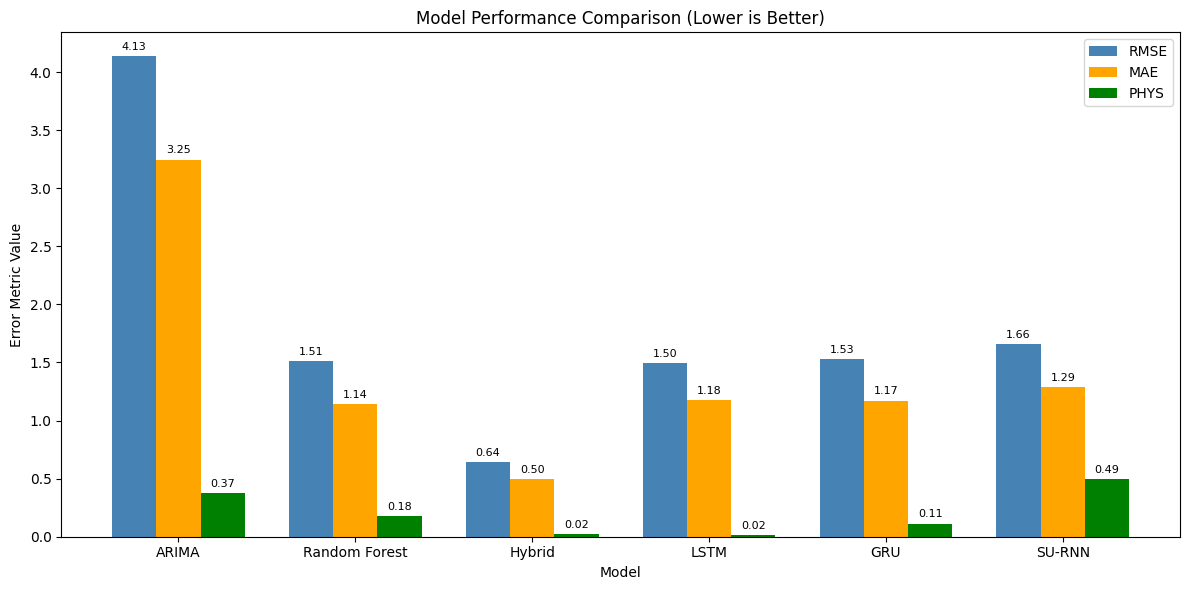

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics
models = summary_df["Model"]
rmse = summary_df["RMSE"]
mae = summary_df["MAE"]
phys = summary_df["PHYS"]

x = np.arange(len(models))  # Label locations
width = 0.25  # Width of bars

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, rmse, width, label='RMSE', color='steelblue')
bar2 = ax.bar(x, mae, width, label='MAE', color='orange')
bar3 = ax.bar(x + width, phys, width, label='PHYS', color='green')

# Add labels and title
ax.set_xlabel("Model")
ax.set_ylabel("Error Metric Value")
ax.set_title("Model Performance Comparison (Lower is Better)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bar values
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
'''from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Helper to calculate warming rate
def calculate_warming_rate(predictions, label):
    days = np.arange(len(predictions)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(days, predictions)
    slope = model.coef_[0] * 365  # Convert to °C per year
    return slope

warming_rates = {
    "ARIMA": calculate_warming_rate(forecast_arima, "ARIMA"),
    "Random Forest": calculate_warming_rate(rf_preds, "Random Forest"),
    "Hybrid": calculate_warming_rate(hybrid_forecast, "Hybrid"),
    "LSTM": calculate_warming_rate(lstm_preds_inv, "LSTM"),
    "GRU": calculate_warming_rate(gru_preds_inv, "GRU"),
    "SU-RNN": calculate_warming_rate(rnn_preds_inv, "SU-RNN")
}

# Display in DataFrame
warming_df = pd.DataFrame(list(warming_rates.items()), columns=["Model", "Warming Rate (°C/year)"])
warming_df.sort_values(by="Warming Rate (°C/year)", ascending=False, inplace=True)
print(warming_df)'''


In [ ]:
print("ARIMA:", type(forecast_arima), np.shape(forecast_arima))
print("RF:", type(rf_preds), np.shape(rf_preds))
print("Hybrid:", type(hybrid_forecast), np.shape(hybrid_forecast))
print("LSTM:", type(lstm_preds_inv), np.shape(lstm_preds_inv))
print("GRU:", type(gru_preds_inv), np.shape(gru_preds_inv))
print("SU-RNN:", type(rnn_preds_inv), np.shape(rnn_preds_inv))


ARIMA: <class 'pandas.core.series.Series'> (120,)
RF: <class 'numpy.ndarray'> (120,)
Hybrid: <class 'pandas.core.series.Series'> (108,)
LSTM: <class 'numpy.ndarray'> (120, 1)
GRU: <class 'numpy.ndarray'> (120, 1)
SU-RNN: <class 'numpy.ndarray'> (120, 1)


In [ ]:
'''def calculate_warming_rate(predictions):
    predictions = np.asarray(predictions).flatten().astype(float)
    days = np.arange(len(predictions)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(days, predictions)
    return model.coef_[0] * 365  # °C/year'''


In [ ]:
'''warming_rates = {
    "ARIMA": calculate_warming_rate(forecast_arima),
    "Random Forest": calculate_warming_rate(rf_preds),
    "Hybrid": calculate_warming_rate(hybrid_forecast),
    "LSTM": calculate_warming_rate(lstm_preds_inv),
    "GRU": calculate_warming_rate(gru_preds_inv),
    "SU-RNN": calculate_warming_rate(rnn_preds_inv)
}

warming_df = pd.DataFrame(list(warming_rates.items()), columns=["Model", "Warming Rate (°C/year)"])

# Now plot it
warming_df.plot(kind='barh', x='Model', y='Warming Rate (°C/year)',
                legend=False, color='firebrick', figsize=(10, 5))
plt.xlabel("Warming Rate (°C/year)")
plt.title("Estimated Temperature Warming Rate by Model")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
'''

Warming Rate Estimation & Plot

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Define custom PHYS metric ---
def phys_metric(true, pred):
    return np.abs(np.mean(true) - np.mean(pred))

# --- Warming Rate Calculation Function ---
'''def calculate_warming_rate(predictions):
    predictions = np.asarray(predictions).flatten().astype(float)
    days = np.arange(len(predictions)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(days, predictions)
    return model.coef_[0] * 365  # Convert per-day slope to per-year warming rate'''

# Fix: convert series to NumPy and reshape
def compute_warming_rate(y_forecast):
    y = np.array(y_forecast).reshape(-1, 1)
    X = np.arange(len(y)).reshape(-1, 1)  # time steps
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0][0]  # °C per month

# Convert to °C/year (since data is monthly)
def to_annual_rate(rate_monthly):
    return rate_monthly * 12

# --- Compute Metrics for All Models ---

rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mae_arima = mean_absolute_error(test, forecast_arima)
phys_arima = phys_metric(test, forecast_arima)
wr_arima = to_annual_rate(compute_warming_rate(forecast_arima))

rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
mae_rf = mean_absolute_error(y_test, rf_preds)
phys_rf = phys_metric(y_test, rf_preds)
wr_rf = to_annual_rate(compute_warming_rate(rf_preds))

rmse_hybrid = np.sqrt(mean_squared_error(test[-len(hybrid_forecast):], hybrid_forecast))
mae_hybrid = mean_absolute_error(test[-len(hybrid_forecast):], hybrid_forecast)
phys_hybrid = phys_metric(test[-len(hybrid_forecast):], hybrid_forecast)
wr_hybrid = to_annual_rate(compute_warming_rate(hybrid_forecast))

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))
mae_lstm = mean_absolute_error(y_test_inv, lstm_preds_inv)
phys_lstm = phys_metric(y_test_inv, lstm_preds_inv)
wr_lstm = to_annual_rate(compute_warming_rate(lstm_preds_inv))

rmse_gru = np.sqrt(mean_squared_error(y_test_inv, gru_preds_inv))
mae_gru = mean_absolute_error(y_test_inv, gru_preds_inv)
phys_gru = phys_metric(y_test_inv, gru_preds_inv)
wr_gru = to_annual_rate(compute_warming_rate(gru_preds_inv))

rmse_rnn = np.sqrt(mean_squared_error(y_test_inv, rnn_preds_inv))
mae_rnn = mean_absolute_error(y_test_inv, rnn_preds_inv)
phys_rnn = phys_metric(y_test_inv, rnn_preds_inv)
wr_rnn = to_annual_rate(compute_warming_rate(rnn_preds_inv))

# --- Create Combined DataFrame ---
results = {
    "Model": ["ARIMA", "Random Forest", "Hybrid", "LSTM", "GRU", "SU-RNN"],
    "RMSE": [rmse_arima, rmse_rf, rmse_hybrid, rmse_lstm, rmse_gru, rmse_rnn],
    "MAE":  [mae_arima,  mae_rf,  mae_hybrid,  mae_lstm,  mae_gru,  mae_rnn],
    "PHYS": [phys_arima, phys_rf, phys_hybrid, phys_lstm, phys_gru, phys_rnn],
    "Warming Rate (°C/year)": [
        wr_arima, wr_rf, wr_hybrid, wr_lstm, wr_gru, wr_rnn
    ]
}

summary_df = pd.DataFrame(results)

# --- Display ---
print(summary_df)

# --- Optional: Save as CSV ---
# summary_df.to_csv("weather_model_metrics_summary.csv", index=False)


           Model      RMSE       MAE      PHYS  Warming Rate (°C/year)
0          ARIMA  4.134929  3.245716  0.372589                0.048354
1  Random Forest  1.510322  1.141621  0.176044                0.189975
2         Hybrid  0.640575  0.498315  0.020802                0.267228
3           LSTM  1.495553  1.176041  0.015836                0.164812
4            GRU  1.528962  1.172407  0.113194                0.137960
5         SU-RNN  1.655888  1.289271  0.493096                0.222138


In [ ]:
# Add RMSE-based rank (lower RMSE = better rank)
summary_df["Rank (by RMSE)"] = summary_df["RMSE"].rank(method='min', ascending=True).astype(int)

# Optionally sort by rank
summary_df = summary_df.sort_values("Rank (by RMSE)")

# Display the ranked summary
print(summary_df)

# Optional: Save to CSV
# summary_df.to_csv("weather_model_metrics_summary_ranked.csv", index=False)


           Model      RMSE       MAE      PHYS  Warming Rate (°C/year)  \
2         Hybrid  0.640575  0.498315  0.020802                0.267228   
3           LSTM  1.495553  1.176041  0.015836                0.164812   
1  Random Forest  1.510322  1.141621  0.176044                0.189975   
4            GRU  1.528962  1.172407  0.113194                0.137960   
5         SU-RNN  1.655888  1.289271  0.493096                0.222138   
0          ARIMA  4.134929  3.245716  0.372589                0.048354   

   Rank (by RMSE)  
2               1  
3               2  
1               3  
4               4  
5               5  
0               6  


           Model  Warming Rate (°C/year)
0         Hybrid                0.267228
1         SU-RNN                0.222138
2  Random Forest                0.189975
3           LSTM                0.164812
4            GRU                0.137960
5          ARIMA                0.048354


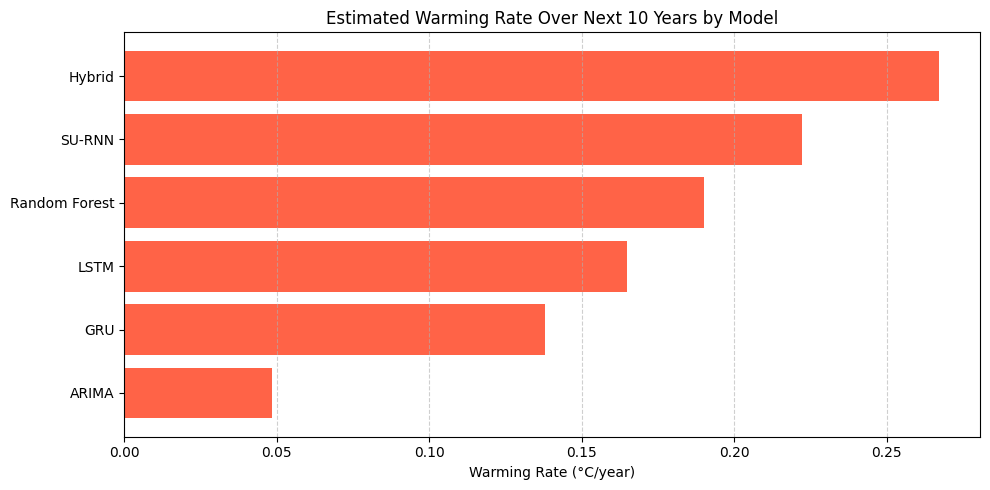

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fix: convert series to NumPy and reshape
def compute_warming_rate(y_forecast):
    y = np.array(y_forecast).reshape(-1, 1)
    X = np.arange(len(y)).reshape(-1, 1)  # time steps
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0][0]  # °C per month

# Convert to °C/year (since data is monthly)
def to_annual_rate(rate_monthly):
    return rate_monthly * 12

# Compute warming rate per model (replace these with your real forecasts if names differ)
warming_rates = {
    "ARIMA": to_annual_rate(compute_warming_rate(forecast_arima)),
    "Random Forest": to_annual_rate(compute_warming_rate(rf_preds)),
    "Hybrid": to_annual_rate(compute_warming_rate(hybrid_forecast)),
    "LSTM": to_annual_rate(compute_warming_rate(lstm_preds_inv)),
    "GRU": to_annual_rate(compute_warming_rate(gru_preds_inv)),
    "SU-RNN": to_annual_rate(compute_warming_rate(rnn_preds_inv)),
}

# Create DataFrame
warming_df = pd.DataFrame(list(warming_rates.items()), columns=["Model", "Warming Rate (°C/year)"])
warming_df = warming_df.sort_values("Warming Rate (°C/year)", ascending=False).reset_index(drop=True)

# Print warming rates
print(warming_df)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(warming_df["Model"], warming_df["Warming Rate (°C/year)"], color='tomato')
plt.xlabel("Warming Rate (°C/year)")
plt.title("Estimated Warming Rate Over Next 10 Years by Model")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
'''import matplotlib.pyplot as plt

# Ensure predictions are NumPy arrays and trimmed to same length if needed
length = min(
    len(forecast_arima), len(rf_preds), len(hybrid_forecast),
    len(lstm_preds_inv), len(gru_preds_inv), len(rnn_preds_inv)
)

# Trim and align series
arima = forecast_arima[:length]
rf = rf_preds[:length]
hybrid = hybrid_forecast[:length]
lstm = lstm_preds_inv[:length]
gru = gru_preds_inv[:length]
rnn = rnn_preds_inv[:length]

# Plot combined trends
plt.figure(figsize=(14, 6))
plt.plot(arima, label='ARIMA', linestyle='--')
plt.plot(rf, label='Random Forest', linestyle=':')
plt.plot(hybrid, label='Hybrid', linestyle='-.')
plt.plot(lstm, label='LSTM', linestyle=':')
plt.plot(gru, label='GRU', linestyle='-.')
plt.plot(rnn, label='SU-RNN', linestyle='--')

plt.title("Combined Model Forecast Trends")
plt.xlabel("Time (Days)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
'''

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from scipy.ndimage import uniform_filter1d
from numpy.polynomial.polynomial import Polynomial

def plot_combined_trends(dates_list, forecasts_list, model_labels, smoothing=False, polynomial=True):
    """
    Plot multiple model forecasts with optional trend smoothing or polynomial fits.

    Parameters:
        dates_list: list of pd.DatetimeIndex (forecast dates for each model)
        forecasts_list: list of np.array (forecasted temperatures in °C)
        model_labels: list of str (model names)
        smoothing: bool, whether to apply rolling smoothing
        polynomial: bool, whether to fit and plot 2nd-degree polynomial trend
    """
    plt.figure(figsize=(14, 6))

    for dates, forecast, label in zip(dates_list, forecasts_list, model_labels):
        y = forecast.flatten()

        if smoothing:
            y_smooth = uniform_filter1d(y, size=12)
            plt.plot(dates, y_smooth, label=f"{label} (Smoothed)", linestyle='-')
        else:
            plt.plot(dates, y, label=f"{label} Forecast", linestyle='--', alpha=0.6)

        # Polynomial trend (e.g., quadratic)
        if polynomial:
            x = np.array([d.toordinal() for d in dates])
            p = Polynomial.fit(x, y, deg=2)
            trend = p(x)
            plt.plot(dates, trend, linewidth=2, label=f"{label} Trend (Poly)")

    plt.title("10-Year Forecasts with Polynomial Trends")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


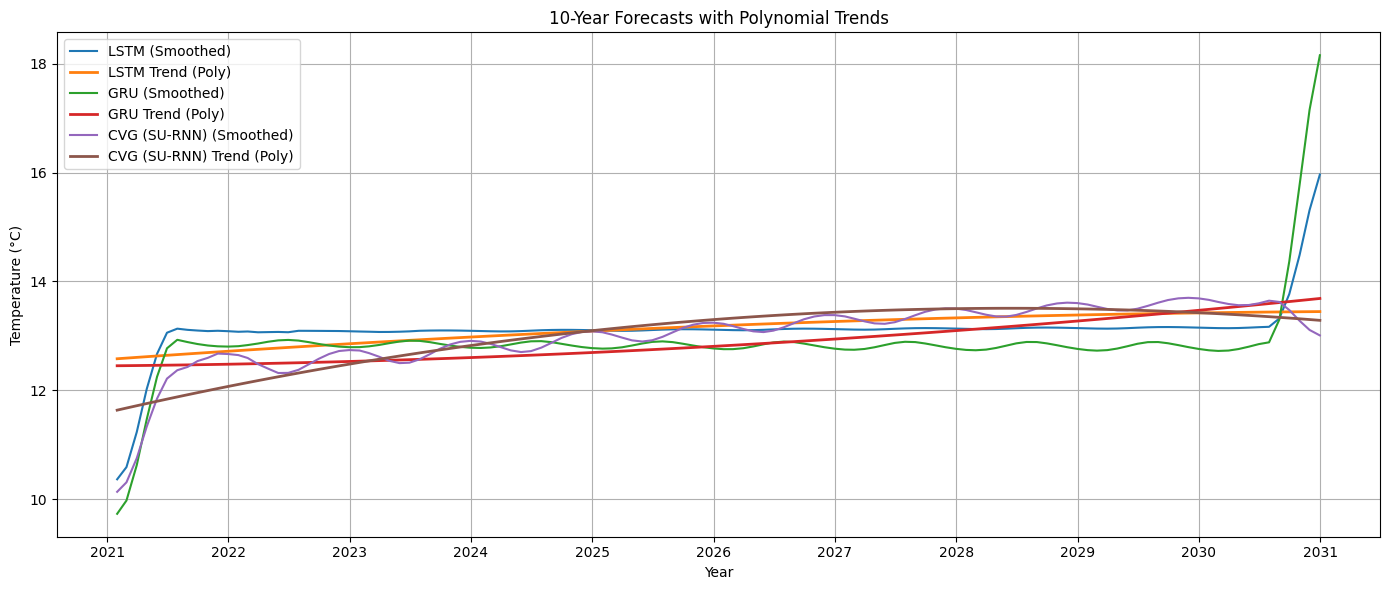

In [ ]:
plot_combined_trends(
    dates_list=[future_dates_10, future_dates_10, future_dates_10],
    forecasts_list=[future_10_lstm, future_10_gru, future_10_rnn],
    model_labels=['LSTM', 'GRU', 'CVG (SU-RNN)'],
    smoothing=True,     # Optional: Smooths using rolling mean (12 months)
    polynomial=True     # Optional: Fits 2nd-degree polynomial trend
)


In [ ]:
def create_lag_features(series, forecast_steps, lags=12):
    future_df = pd.DataFrame()
    data = list(series[-lags:].values)

    for _ in range(forecast_steps):
        lags_input = data[-lags:]
        future_df = pd.concat([future_df, pd.DataFrame([lags_input])], ignore_index=True)
        next_pred = rf.predict([lags_input])[0]  # You may replace this with hybrid logic
        data.append(next_pred)

    future_df.columns = [f'lag_{i}' for i in range(1, lags + 1)]
    return future_df


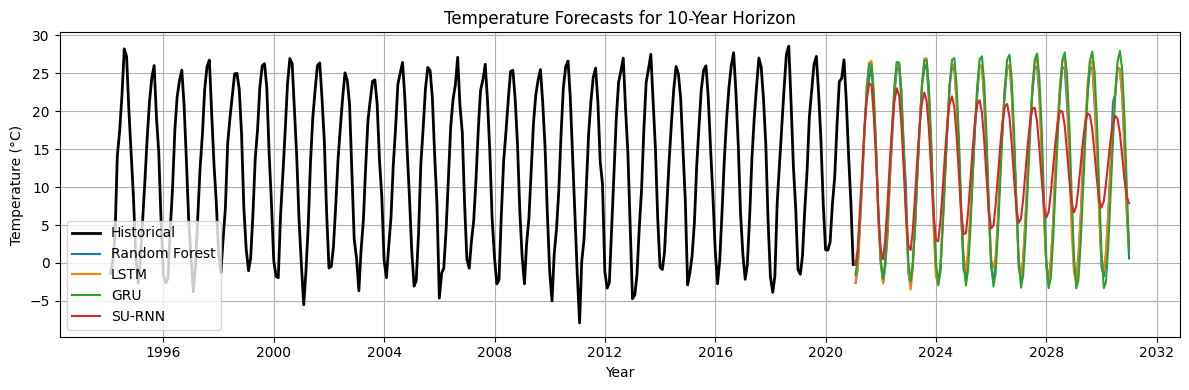

In [ ]:
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset

# Define forecast horizons
future_months = {
    "10-Year": 120
    #"25-Year": 300,
    #"50-Year": 600,
    #"100-Year": 1200
}

# Choose one horizon to display (e.g., 100-Year)
horizon_label = "10-Year"
steps = future_months[horizon_label]

# Assume temp_monthly is your original historical data
last_date = temp_monthly.index[-1]
future_dates = pd.date_range(start=last_date + DateOffset(months=1), periods=steps, freq='M')


# All forecasts (must be pre-computed and stored)
forecasts = {
    "ARIMA": forecast_arima,  # Example
    "Random Forest": rf_preds,
    "Hybrid": hybrid_forecast,  # simple hybrid
    "LSTM": lstm_preds_inv,  # assumed defined
    "GRU": future_10_gru,    # reuse same func
    "SU-RNN": future_10_rnn
}

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(temp_monthly.index, temp_monthly, label='Historical', color='black', linewidth=2)

for name, preds in forecasts.items():
    if isinstance(preds, np.ndarray):
        plt.plot(future_dates, preds.flatten(), label=name)

plt.title(f"Temperature Forecasts for {horizon_label} Horizon")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
'''
# Check for additional features
if 'humidity' in df.columns and 'wind' in df.columns:
    print("Using multivariate features: temp, humidity, wind")
    features = df[['temp', 'humidity', 'wind']]
    scaler_multi = MinMaxScaler()
    scaled_multi = scaler_multi.fit_transform(features)

    def create_multivariate_sequences(data, window_size):
        X, y = [], []
        for i in range(len(data) - window_size):
            X.append(data[i:i+window_size])
            y.append(data[i+window_size, 0])  # Predict temperature only
        return np.array(X), np.array(y)

    X_multi, y_multi = create_multivariate_sequences(scaled_multi, 30)
    split = len(X_multi) - 365
    X_train_m, X_test_m = X_multi[:split], X_multi[split:]
    y_train_m, y_test_m = y_multi[:split], y_multi[split:]
else:
    print("Multivariate features not found. Skipping.")
'''

In [ ]:
'''
if 'humidity' in df.columns and 'wind' in df.columns:
    lstm_multi = Sequential([
        LSTM(64, activation='relu', input_shape=(30, X_train_m.shape[2])),
        Dense(1)
    ])
    lstm_multi.compile(optimizer='adam', loss='mse')
    lstm_multi.fit(X_train_m, y_train_m, epochs=20, batch_size=32, validation_split=0.1)
    lstm_multi_preds = lstm_multi.predict(X_test_m)
    lstm_multi_preds = scaler_multi.inverse_transform(np.concatenate([lstm_multi_preds, np.zeros((len(lstm_multi_preds), 2))], axis=1))[:,0]
    y_test_m_inv = scaler_multi.inverse_transform(np.concatenate([y_test_m.reshape(-1,1), np.zeros((len(y_test_m), 2))], axis=1))[:,0]
    rmse_lstm_m = np.sqrt(mean_squared_error(y_test_m_inv, lstm_multi_preds))
    mae_lstm_m = mean_absolute_error(y_test_m_inv, lstm_multi_preds)
    print("Multivariate LSTM RMSE:", rmse_lstm_m)
    print("Multivariate LSTM MAE:", mae_lstm_m)
'''